In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,accuracy_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
import numpy as np  
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind, levene
from sklearn.linear_model import LassoCV
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import seaborn as sns #
import matplotlib.pyplot as plt #
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from scipy import stats
from sklearn.neural_network import MLPClassifier
pd.set_option('precision',3)
import itertools
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import pymrmr
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
data = pd.read_csv('all_feature_mix.csv')
data.head()

,LVSI,DSI,age,pregnancy times,abortion times,delivery times,tumor diameter,FIGO Stage,Histology,Image type,...,logarithm_gldm_LargeDependenceLowGrayLevelEmphasis,logarithm_gldm_LowGrayLevelEmphasis,logarithm_gldm_SmallDependenceEmphasis,logarithm_gldm_SmallDependenceHighGrayLevelEmphasis,logarithm_gldm_SmallDependenceLowGrayLevelEmphasis,logarithm_ngtdm_Busyness,logarithm_ngtdm_Coarseness,logarithm_ngtdm_Complexity,logarithm_ngtdm_Contrast,logarithm_ngtdm_Strength
0,1,1,47,3,1,2,3.5,1,1,an deng rong-label_label_1,...,0.066,0.001,0.027,81.015,1.261e-04,0.232,0.002,449.469,0.028,2.995
1,0,1,52,3,1,2,4.3,1,1,baifenglan,...,4.462,0.054,0.032,0.991,2.711e-03,4.669,0.004,20.140,0.033,0.104
2,1,1,46,4,3,1,3.5,1,1,bianhongli,...,4.727,0.015,0.011,0.713,3.369e-04,6.608,0.001,15.938,0.006,0.099
3,0,1,58,4,2,2,3.5,2,3,cailin,...,0.051,0.002,0.029,111.517,2.322e-04,0.381,0.001,367.492,0.038,1.894
4,0,0,71,8,3,5,2.0,1,1,cao ze ping-label_label_1,...,0.436,0.011,0.044,25.933,5.843e-04,0.273,0.006,456.940,0.585,3.075


In [3]:
y = data['LVSI']
columns = data.columns.values.tolist()
columns.remove('LVSI')
columns.remove('Image type ')
x1 = data[columns]
data_save = data
x = pd.concat([y, x1], axis =1)

Number of LVSI_0:  114
Number of LVSI_1 :  108


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


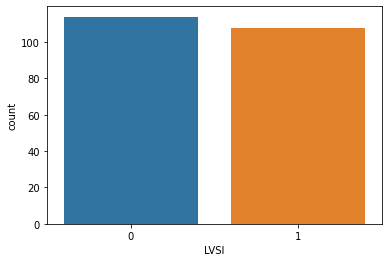

In [4]:
ax = sns.countplot(y, label='Count')
LVSI_0, LVSI_1 = y.value_counts()
print('Number of LVSI_0: ',LVSI_0)
print('Number of LVSI_1 : ',LVSI_1)

In [5]:
x1.describe()

,DSI,age,pregnancy times,abortion times,delivery times,tumor diameter,FIGO Stage,Histology,original_shape_MinorAxisLength,original_shape_Sphericity,...,logarithm_gldm_LargeDependenceLowGrayLevelEmphasis,logarithm_gldm_LowGrayLevelEmphasis,logarithm_gldm_SmallDependenceEmphasis,logarithm_gldm_SmallDependenceHighGrayLevelEmphasis,logarithm_gldm_SmallDependenceLowGrayLevelEmphasis,logarithm_ngtdm_Busyness,logarithm_ngtdm_Coarseness,logarithm_ngtdm_Complexity,logarithm_ngtdm_Contrast,logarithm_ngtdm_Strength
count,222.000,222.000,222.000,222.000,222.000,222.000,222.000,222.000,222.000,222.000,...,222.000,2.220e+02,222.000,222.000,2.220e+02,222.000,2.220e+02,222.000,222.000,222.000
mean,0.721,52.982,3.302,1.423,1.865,3.242,1.716,1.117,25.697,0.637,...,4.590,1.982e-02,0.025,29.007,6.196e-04,5.012,2.436e-03,228.192,0.045,1.113
std,0.450,9.045,1.299,0.942,0.937,1.261,0.832,0.386,8.247,0.073,...,15.731,4.258e-02,0.020,58.146,7.240e-04,9.518,3.038e-03,419.789,0.086,2.265
min,0.000,28.000,1.000,0.000,0.000,1.000,1.000,1.000,8.508,0.427,...,0.009,3.142e-04,0.004,0.016,2.472e-05,0.026,1.353e-04,0.584,0.002,0.007
25%,0.000,48.000,2.000,1.000,1.000,2.500,1.000,1.000,19.480,0.591,...,0.139,1.710e-03,0.014,1.157,1.296e-04,0.723,7.090e-04,26.071,0.010,0.124
50%,1.000,53.000,3.000,1.000,2.000,3.000,1.000,1.000,24.853,0.643,...,0.535,5.824e-03,0.022,6.981,3.514e-04,1.866,1.479e-03,79.608,0.017,0.418
75%,1.000,59.000,4.000,2.000,2.000,4.000,2.000,1.000,30.590,0.692,...,3.044,1.976e-02,0.031,33.102,7.952e-04,5.085,2.963e-03,213.689,0.036,1.283
max,1.000,77.000,8.000,4.000,5.000,9.000,3.000,3.000,47.391,0.802,...,207.261,5.012e-01,0.261,508.701,3.943e-03,77.822,2.705e-02,2711.034,0.658,27.595


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

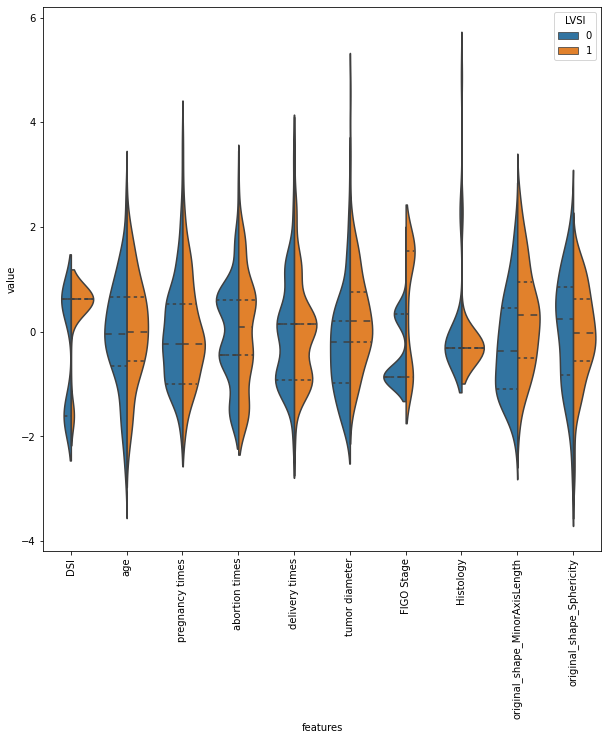

In [6]:
# 观察前10个特征，可以看到对于LSVI 0/1两类，age特征的中位数相近，对分类不能提供很好的分类信息
# 但是观察Original_shape_sphericity的中位数看起来是分隔开的，因此这个特征对分类有用
data_dia = y
data = x1
data_n_2 = (data - data.mean()) / (data.std())              # 标准化
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="LVSI",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="LVSI", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

In [7]:
data_train, data_test = train_test_split(x,test_size=0.3,random_state = 25, stratify = y)
data_train_a = data_train[:][data_train['LVSI'] == 1]
data_train_b = data_train[:][data_train['LVSI'] == 0]
data_test_a = data_test[:][data_test['LVSI'] == 1]
data_test_b = data_test[:][data_test['LVSI'] == 0]
print(data_train_a.shape)
print(data_train_b.shape)
print(data_test_a.shape)
print(data_test_b.shape)

(75, 1781)
(80, 1781)
(33, 1781)
(34, 1781)


# T检验特征筛选

In [8]:
index = []
for colName in x.columns[:]:
    if levene(data_train_a[colName], data_train_b[colName])[1] > 0.05: 
        if ttest_ind(data_train_a[colName], data_train_b[colName])[1] < 0.05: 
            index.append(colName)
    else: 
        if ttest_ind(data_train_a[colName], data_train_b[colName],equal_var=False)[1] < 0.05: 
            index.append(colName)
print(len(index))
t=len(index)
print(index)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:2603: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


466
['LVSI', 'DSI', 'tumor diameter', 'FIGO Stage', 'original_shape_MinorAxisLength', 'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio', 'original_shape_VoxelVolume', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_glrlm_GrayLevelNonUniformity', 'original_glrlm_RunLengthNonUniformity', 'original_glszm_GrayLevelNonUniformity', 'original_glszm_LargeAreaHighGrayLevelEmphasis', 'original_glszm_SizeZoneNonUniformity', 'original_gldm_DependenceNonUniformity', 'original_gldm_GrayLevelNonUniformity', 'original_ngtdm_Busyness', 'original_ngtdm_Coarseness', 'original_ngtdm_Contrast', 'wavelet-LLH_firstorder_10Percentile', 'wavelet-LLH_firstorder_90Percentile', 'wavelet-LLH_firstorder_Entropy', 'wavelet-LLH_firstorder_InterquartileRange', 'wavelet-LLH_firstorder_Kurtosis', 'wavelet-LLH_firstorder_MeanAbsoluteDeviation', 'wavelet-LLH_firstorder_RobustMeanAbsoluteDeviation', 'wavelet-LLH_firstorder_RootMeanSquared', 'wavelet-LLH_glcm_DifferenceAve

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

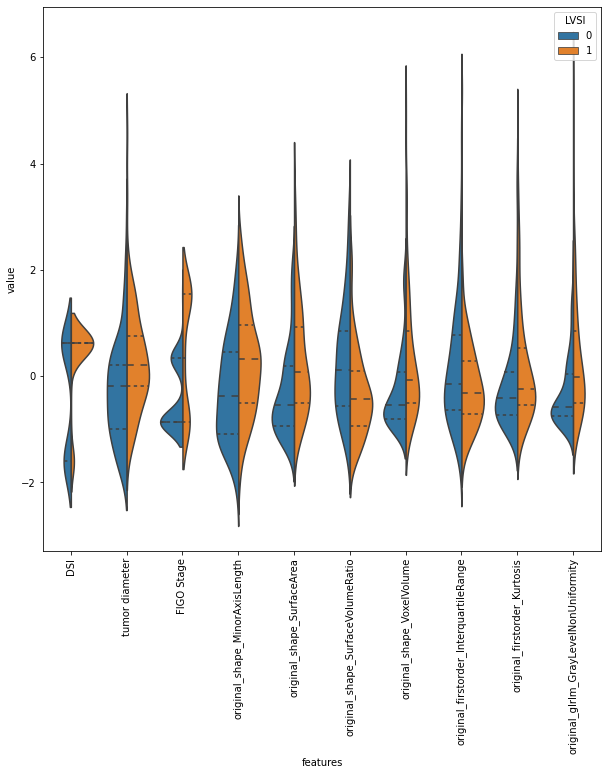

In [9]:
data_dia = y
data = x1[index[1:]]
data_n_2 = (data - data.mean()) / (data.std())              # 标准化
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="LVSI",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="LVSI", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

T检验后训练集数据整理

In [10]:
data_train_a = data_train_a[index]
data_train_b = data_train_b[index]
data_train = pd.concat([data_train_a, data_train_b])
#data_train = shuffle(data_train)
data_train.index = range(len(data_train))
X_train = data_train[data_train.columns[1:]]
# 注意下面两行在训练集与测试集上的区别
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = index[1:]
y_train = data_train['LVSI']
X_train_raw=X_train
y_train_rawg=y_train
y_train_rawg

0      1
1      1
2      1
3      1
4      1
      ..
150    0
151    0
152    0
153    0
154    0
Name: LVSI, Length: 155, dtype: int64

T检验后测试集数据整理

In [11]:
data_test_a = data_test_a[index]
data_test_b = data_test_b[index]
data_test = pd.concat([data_test_a, data_test_b])
#data_test = shuffle(data_test)
data_test.index = range(len(data_test))
X_test = data_test[data_test.columns[1:]]
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.columns = index[1:]
y_test = data_test['LVSI']
y_testg=y_test
X_test_raw=X_test
y_testg

0     1
1     1
2     1
3     1
4     1
     ..
62    0
63    0
64    0
65    0
66    0
Name: LVSI, Length: 67, dtype: int64

In [12]:
data=X_train
label=pd.DataFrame(y_train)
dataa=pd.concat([label,data],axis = 1)
import pymrmr
index4 = pymrmr.mRMR(dataa, 'MIQ',50)
X_train = X_train[index4]
X_test= X_test[index4]
X_test

,FIGO Stage,wavelet-HHL_ngtdm_Contrast,log-sigma-2-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis,exponential_glszm_LargeAreaEmphasis,wavelet-HLH_ngtdm_Coarseness,wavelet-LLL_firstorder_RobustMeanAbsoluteDeviation,square_glrlm_RunVariance,DSI,squareroot_glszm_GrayLevelNonUniformity,square_glcm_Correlation,...,square_ngtdm_Busyness,wavelet-LHH_glszm_LowGrayLevelZoneEmphasis,log-sigma-3-0-mm-3D_ngtdm_Busyness,log-sigma-4-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis,lbp-3D-m2_firstorder_Kurtosis,wavelet-HHL_glszm_GrayLevelNonUniformity,wavelet-LLH_firstorder_MeanAbsoluteDeviation,wavelet-LLH_ngtdm_Coarseness,log-sigma-4-0-mm-3D_gldm_DependenceNonUniformity,wavelet-LHL_glszm_SizeZoneNonUniformity
0,1.546,-0.462,-0.113,-0.442,-0.120,0.111,-0.612,0.580,-0.637,0.206,...,-0.748,-0.560,-0.516,-0.481,0.594,-0.551,0.294,-0.113,-0.594,0.171
1,1.546,-0.548,3.009,0.161,-0.832,-0.480,-0.275,0.580,3.709,-0.072,...,1.073,-0.871,2.245,1.053,-1.257,7.736,-0.619,-0.866,4.469,3.833
2,-0.850,-0.597,0.523,-0.437,-0.228,0.533,-0.574,0.580,-0.509,0.359,...,-0.733,-0.824,-0.685,0.019,1.848,-0.670,0.123,-0.224,-0.458,-0.346
3,-0.850,0.003,-0.705,-0.437,1.548,0.541,-0.694,-1.725,-0.895,0.497,...,-0.733,-0.803,-0.825,-0.297,-0.328,-0.360,0.678,1.356,-0.751,-0.176
4,1.546,-0.596,-0.535,0.025,-0.622,0.446,-0.359,0.580,1.087,0.362,...,0.704,-0.743,0.518,-0.284,-0.582,0.424,0.166,-0.605,-0.020,0.741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.348,0.853,-0.963,-0.443,5.290,0.622,-0.621,-1.725,-1.222,-0.095,...,-0.318,2.117,-0.790,-0.645,-1.416,-0.638,0.643,4.873,-0.838,-0.634
63,-0.850,4.546,-0.857,-0.397,0.287,-0.032,-0.301,0.580,-1.047,0.677,...,0.007,1.834,0.016,-0.721,0.676,-0.729,-0.038,0.350,-0.676,-0.727
64,0.348,-0.470,0.134,0.071,-0.759,-0.523,-0.090,0.580,0.847,0.715,...,-0.061,0.038,0.604,0.384,0.738,-0.585,-0.360,-0.788,0.943,-0.129
65,-0.850,-0.436,-0.520,-0.318,-0.191,-0.818,0.508,-1.725,-0.299,-1.323,...,0.150,-0.672,-0.398,-0.627,-0.825,-0.565,-0.440,-0.151,-0.466,-0.371


In [13]:
X_train

,FIGO Stage,wavelet-HHL_ngtdm_Contrast,log-sigma-2-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis,exponential_glszm_LargeAreaEmphasis,wavelet-HLH_ngtdm_Coarseness,wavelet-LLL_firstorder_RobustMeanAbsoluteDeviation,square_glrlm_RunVariance,DSI,squareroot_glszm_GrayLevelNonUniformity,square_glcm_Correlation,...,square_ngtdm_Busyness,wavelet-LHH_glszm_LowGrayLevelZoneEmphasis,log-sigma-3-0-mm-3D_ngtdm_Busyness,log-sigma-4-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis,lbp-3D-m2_firstorder_Kurtosis,wavelet-HHL_glszm_GrayLevelNonUniformity,wavelet-LLH_firstorder_MeanAbsoluteDeviation,wavelet-LLH_ngtdm_Coarseness,log-sigma-4-0-mm-3D_gldm_DependenceNonUniformity,wavelet-LHL_glszm_SizeZoneNonUniformity
0,1.546,-0.399,0.605,0.134,-0.698,-0.209,-0.413,0.580,1.256,0.226,...,-0.216,-0.578,0.184,-0.387,-0.593,0.625,-0.316,-0.726,0.550,0.223
1,-0.850,0.081,-0.629,1.048,-0.676,-0.777,-0.126,0.580,-0.187,0.480,...,1.716,0.067,1.067,-0.125,0.544,-0.691,-0.884,-0.706,0.803,-0.538
2,1.546,-0.705,0.358,7.872,-0.808,-0.701,3.848,0.580,2.898,-0.415,...,5.132,-0.703,0.066,2.150,-0.801,3.197,-0.611,-0.841,3.297,1.367
3,1.546,-0.687,1.116,0.861,-0.785,-0.435,4.023,0.580,1.738,0.053,...,0.784,-0.851,1.147,0.343,-0.580,1.799,-0.989,-0.822,3.218,0.834
4,-0.850,0.269,-0.918,-0.419,0.895,-0.308,-0.610,0.580,-0.703,-0.607,...,-0.479,-0.446,-0.664,-0.416,-1.052,-0.304,1.365,0.762,-0.742,0.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,-0.850,-0.485,-0.801,-0.443,2.137,1.836,-0.647,-1.725,-1.067,0.497,...,-0.681,2.512,-0.778,-0.735,0.916,-0.718,1.164,1.880,-0.764,-0.580
151,-0.850,-0.198,-0.213,-0.435,0.085,0.201,-0.547,0.580,-0.804,0.965,...,-0.701,0.351,-0.582,-0.019,1.421,-0.721,0.006,0.070,-0.615,-0.649
152,0.348,0.151,0.373,-0.430,0.189,-0.334,-0.382,0.580,-0.956,0.956,...,-0.716,0.151,-0.645,-0.514,0.368,-0.689,-0.042,0.229,-0.669,-0.633
153,-0.850,0.075,-0.778,-0.380,0.208,-0.713,-0.154,0.580,-0.960,0.482,...,-0.417,2.106,-0.046,-0.211,0.272,-0.752,-0.599,0.332,-0.631,-0.726


In [14]:
X_train_smo = X_train_raw
y_train_smo = y_train
smo = SMOTE(random_state =20)
X_train_smo, y_train_smo = smo.fit_resample(X_train, y_train)
X_train_smo1 = X_train_smo
X_train_smo

,FIGO Stage,wavelet-HHL_ngtdm_Contrast,log-sigma-2-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis,exponential_glszm_LargeAreaEmphasis,wavelet-HLH_ngtdm_Coarseness,wavelet-LLL_firstorder_RobustMeanAbsoluteDeviation,square_glrlm_RunVariance,DSI,squareroot_glszm_GrayLevelNonUniformity,square_glcm_Correlation,...,square_ngtdm_Busyness,wavelet-LHH_glszm_LowGrayLevelZoneEmphasis,log-sigma-3-0-mm-3D_ngtdm_Busyness,log-sigma-4-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis,lbp-3D-m2_firstorder_Kurtosis,wavelet-HHL_glszm_GrayLevelNonUniformity,wavelet-LLH_firstorder_MeanAbsoluteDeviation,wavelet-LLH_ngtdm_Coarseness,log-sigma-4-0-mm-3D_gldm_DependenceNonUniformity,wavelet-LHL_glszm_SizeZoneNonUniformity
0,1.546,-0.399,0.605,0.134,-0.698,-0.209,-0.413,0.58,1.256,0.226,...,-0.216,-0.578,0.184,-0.387,-0.593,0.625,-0.316,-0.726,0.550,0.223
1,-0.850,0.081,-0.629,1.048,-0.676,-0.777,-0.126,0.58,-0.187,0.480,...,1.716,0.067,1.067,-0.125,0.544,-0.691,-0.884,-0.706,0.803,-0.538
2,1.546,-0.705,0.358,7.872,-0.808,-0.701,3.848,0.58,2.898,-0.415,...,5.132,-0.703,0.066,2.150,-0.801,3.197,-0.611,-0.841,3.297,1.367
3,1.546,-0.687,1.116,0.861,-0.785,-0.435,4.023,0.58,1.738,0.053,...,0.784,-0.851,1.147,0.343,-0.580,1.799,-0.989,-0.822,3.218,0.834
4,-0.850,0.269,-0.918,-0.419,0.895,-0.308,-0.610,0.58,-0.703,-0.607,...,-0.479,-0.446,-0.664,-0.416,-1.052,-0.304,1.365,0.762,-0.742,0.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.850,-0.533,0.440,0.117,-0.533,-0.708,0.387,0.58,0.014,-0.342,...,-0.004,-0.045,-0.421,0.465,-1.069,0.082,-0.474,-0.531,-0.211,0.052
156,-0.732,-0.300,-0.889,-0.295,-0.168,-0.559,-0.061,-1.61,-0.346,-0.353,...,1.754,1.924,0.511,-0.758,1.491,-0.736,-0.652,-0.133,-0.536,-0.662
157,1.546,-0.298,0.131,-0.014,-0.582,-0.649,0.018,0.58,-0.214,0.033,...,-0.183,-0.274,-0.143,-0.217,-0.565,0.118,-0.470,-0.588,0.017,-0.076
158,1.448,-0.126,-0.712,-0.423,0.831,0.937,-0.437,0.58,-0.961,-0.290,...,-0.349,-0.269,-0.677,-0.470,-0.451,-0.515,-0.019,0.855,-0.731,-0.483


In [15]:
X_train_smog=X_train_smo
y_train_smog=y_train_smo
X_train_rawg=X_train_raw
y_train_rawg=y_train
X_train_mrmr=X_train_smo[index4]
X_test_mrmr=X_test[index4]

In [16]:
print(X_train_smo.shape,X_test_mrmr.shape)

(160, 50) (67, 50)


[[27  7]
 [10 23]]
[[24 10]
 [ 8 25]]
[[28  6]
 [15 18]]
[[26  8]
 [13 20]]
[[31  3]
 [12 21]]
[[27  7]
 [15 18]]
[[32  2]
 [15 18]]
[[28  6]
 [10 23]]


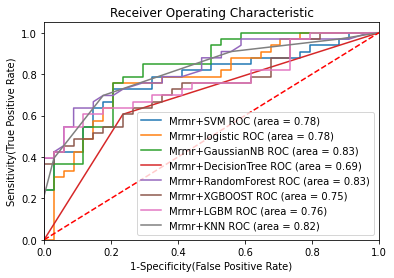

,m,AUC,SEN,SPE,ACC
0,Mrmr+SVM,0.782,0.697,0.794,0.746
1,Mrmr+logistic,0.780,0.758,0.706,0.731
2,Mrmr+GaussianNB,0.827,0.545,0.824,0.687
3,Mrmr+DecisionTree,0.685,0.606,0.765,0.687
4,Mrmr+RandomForest,0.828,0.636,0.912,0.776
5,Mrmr+XGBOOST,0.745,0.545,0.794,0.672
6,Mrmr+LGBM,0.763,0.545,0.941,0.746
7,Mrmr+KNN,0.816,0.697,0.824,0.761


In [17]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
result_model=[]
result_auc=[]
result_accuracy=[]
result_precision=[]
result_recall=[]
result_f1_score=[]
sensitivity=[]
specificity=[]
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Mrmr+SVM',
    'model': SVC(probability=True,random_state=20,class_weight='balanced'
        ),
},
{
    'label': 'Mrmr+logistic',
    'model': LogisticRegression(random_state=20,
                                max_iter=100000,class_weight='balanced',
                                
                               solver='liblinear'),
        
},
{
    'label': 'Mrmr+GaussianNB',
    'model': GaussianNB(),
},
{
    'label': 'Mrmr+DecisionTree',
    'model': DecisionTreeClassifier(random_state=20,
                                   
                                    criterion='entropy'),
},
{
    'label': 'Mrmr+RandomForest',
    'model': RandomForestClassifier(
                                    criterion = 'entropy',
                                    random_state=20),
},
{
    'label': 'Mrmr+XGBOOST',
    'model': XGBClassifier(random_state=20) ,
},
    {
    'label': 'Mrmr+LGBM',
    'model':lgb.LGBMClassifier(random_state=20),
},

    {
    'label': 'Mrmr+KNN',
    'model':KNeighborsClassifier()
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_smo, y_train_smo) # train the model
    y_pred=model.predict_proba(X_test_mrmr) # predict the test data
    y_pre=model.predict(X_test_mrmr)
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_mrmr)[:,1])
# Calculate Area under the curve to display on the plot
 
    aauc = metrics.roc_auc_score(y_test,model.predict_proba(X_test_mrmr)[:,1])
    result_auc.append(aauc)

    aaccuracy=metrics.accuracy_score(y_test,y_pre)
    result_accuracy.append(aaccuracy)
    apreci=metrics.precision_score(y_test,y_pre)
    result_precision.append(apreci)
    arecall=metrics.recall_score(y_test,y_pre)
    result_recall.append(arecall)
    af1_score=metrics.f1_score(y_test,y_pre)
    result_f1_score.append(af1_score)
    result_model.append(m['label'])
    confusion = confusion_matrix(y_test,y_pre)
    print(confusion )
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    a_Sensitivity=TP / float(TP+FN)
    sensitivity.append(a_Sensitivity)
    a_Specificity=TN / float(TN+FP)
    specificity.append(a_Specificity)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], aauc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()   # Display
result1={'m':result_model,
         'AUC':result_auc,
         'SEN':sensitivity,
         'SPE':specificity,
        'ACC':result_accuracy,
        #'precision':aresult_precision,
        #'recall':aresult_recall,
       # 'f1_score':aresult_f1_score
        }
frame0 = pd.DataFrame(result1)
frame0

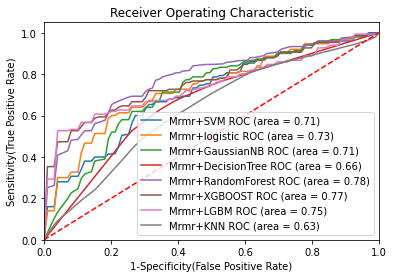

,m,K-foldAUC,95%CI,RSD,交叉验证平均Sensitivity,交叉验证平均Specificity
0,Mrmr+SVM,0.706,"(0.6445070370878141, 0.767544244963468)",0.076,0.622,0.776
1,Mrmr+logistic,0.731,"(0.6930730477909076, 0.7684844070998805)",0.045,0.640,0.742
2,Mrmr+GaussianNB,0.712,"(0.6475195477565387, 0.7762981160611249)",0.079,0.630,0.737
3,Mrmr+DecisionTree,0.662,"(0.5921304642683902, 0.732000589862664)",0.092,0.641,0.718
4,Mrmr+RandomForest,0.783,"(0.7401949081146706, 0.8262913217048924)",0.048,0.647,0.726
5,Mrmr+XGBOOST,0.766,"(0.7224458619514954, 0.8113623051900049)",0.050,0.647,0.728
6,Mrmr+LGBM,0.745,"(0.69284162493844, 0.7987063332761847)",0.062,0.645,0.729
7,Mrmr+KNN,0.629,"(0.5447826751974194, 0.7122353684872909)",0.116,0.634,0.722


In [18]:
data=X_train_raw
data=data[index4]
label=pd.DataFrame(y_train)
dataa=pd.concat([label,data],axis = 1)
Xp = dataa.iloc[:,1:]
yp = dataa['LVSI']

from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
plt.figure()
result_kauc=[]
result_RSD=[]
result_model=[]
result_kSensitivity=[]
result_kSpecificity=[]
CIs=[]
# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Mrmr+SVM',
    'model': SVC(probability=True,random_state=20,class_weight='balanced'
        ),
},
{
    'label': 'Mrmr+logistic',
    'model': LogisticRegression(random_state=20,
                                max_iter=100000,class_weight='balanced',
                                
                               solver='liblinear'),
        
},
{
    'label': 'Mrmr+GaussianNB',
    'model': GaussianNB(),
},
{
    'label': 'Mrmr+DecisionTree',
    'model': DecisionTreeClassifier(random_state=20,
                                   
                                    criterion='entropy'),
},
{
    'label': 'Mrmr+RandomForest',
    'model': RandomForestClassifier(
                                    criterion = 'entropy',
                                    random_state=20),
},
{
    'label': 'Mrmr+XGBOOST',
    'model': XGBClassifier(random_state=20) ,
},
    {
    'label': 'Mrmr+LGBM',
    'model':lgb.LGBMClassifier(random_state=20),
},
     {
    'label': 'Mrmr+KNN',
    'model':KNeighborsClassifier()
}
]
for m in models:
    model = m['model'] 
    #定义n折交叉验证
    tprs=[]
    aucs=[]
    kSensitivity=[]
    kSpecificity=[]
    mean_fpr=np.linspace(0,1,100)
    skFold=RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=25)
    i=0
    for train,test in skFold.split(Xp,yp):
        PX_train, PX_test = Xp.iloc[train], Xp.iloc[test]
        Py_train, Py_test = yp.iloc[train], yp.iloc[test]
        model.fit(PX_train,Py_train)
        y_pred=model.predict(PX_test)
        fpr, tpr, thresholds = metrics.roc_curve(Py_test,model.predict_proba(PX_test)[:,1])
        tprs.append(np.interp(mean_fpr,fpr,tpr))
        tprs[-1][0]=0.0
        roc_auc=auc(fpr,tpr)
        aucs.append(roc_auc)  
        confusion = confusion_matrix(Py_test,y_pred)
        TP = confusion[1, 1]
        TN = confusion[0, 0]
        FP = confusion[0, 1]
        FN = confusion[1, 0]
        k_Sensitivity=TP / float(TP+FN)
        sensitivity.append(k_Sensitivity)
        k_Specificity=TN / float(TN+FP)
        specificity.append(k_Specificity)
        i+=1
    mean_tpr=np.mean(tprs,axis=0)
    mean_tpr[-1]=1.0
    mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
    std_auc=np.std(aucs,axis=0)
    RSD=std_auc/mean_auc
    sem_auc=stats.sem(aucs,axis=0)
    CI = stats.t.interval(0.95,df=len(aucs)-1,loc=np.mean(aucs),scale=sem_auc)
    CIs.append(CI)  
    k_Sensitivity=np.mean(sensitivity)
    k_Specificity=np.mean(specificity)
    result_model.append(m['label'])
    result_kauc.append(mean_auc)
    result_RSD.append(RSD)
    result_kSensitivity.append(k_Sensitivity)
    result_kSpecificity.append(k_Specificity)
    #plt.fill_between(mean_tpr,tprs_lower,tprs_upper,color='gray',alpha=.2)
    plt.plot(mean_fpr,mean_tpr,label='%s ROC (area = %0.2f)' % (m['label'], mean_auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

resultk1={'m':result_model,
         'K-foldAUC':result_kauc,
        '95%CI':CIs,
        'RSD':result_RSD,
        '交叉验证平均Sensitivity':result_kSensitivity,
       '交叉验证平均Specificity':result_kSpecificity}
framex0= pd.DataFrame(resultk1)
framex0

LASSO降维

In [19]:
alphas = np.logspace(-4,4,20)#
model_lassoCV = LassoCV(alphas = alphas,cv=5,max_iter = 1000000,random_state = 20).fit(X_train_smo,y_train_smo)
coef = pd.Series(model_lassoCV.coef_, index = X_train_smo.columns)
print(model_lassoCV.alpha_)
print('%s %d'%('Lasso picked',sum(coef != 0)))
L=sum(coef != 0)
index2 = coef[coef != 0].index
X_train_Lasso = X_train_smo[index2]
X_test_Lasso = X_test_raw[index2]
X_train_Lasso 
print(X_train_Lasso.columns)

0.03359818286283781
Lasso picked 12
Index(['FIGO Stage', 'log-sigma-2-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis',
       'DSI', 'square_glcm_Correlation',
       'logarithm_glszm_LargeAreaHighGrayLevelEmphasis',
       'wavelet-HHL_glszm_SmallAreaLowGrayLevelEmphasis',
       'wavelet-LHL_gldm_LargeDependenceHighGrayLevelEmphasis',
       'lbp-3D-k_glcm_Imc1', 'lbp-3D-k_firstorder_Minimum',
       'square_ngtdm_Busyness', 'log-sigma-3-0-mm-3D_ngtdm_Busyness',
       'wavelet-LHL_glszm_SizeZoneNonUniformity'],
      dtype='object')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

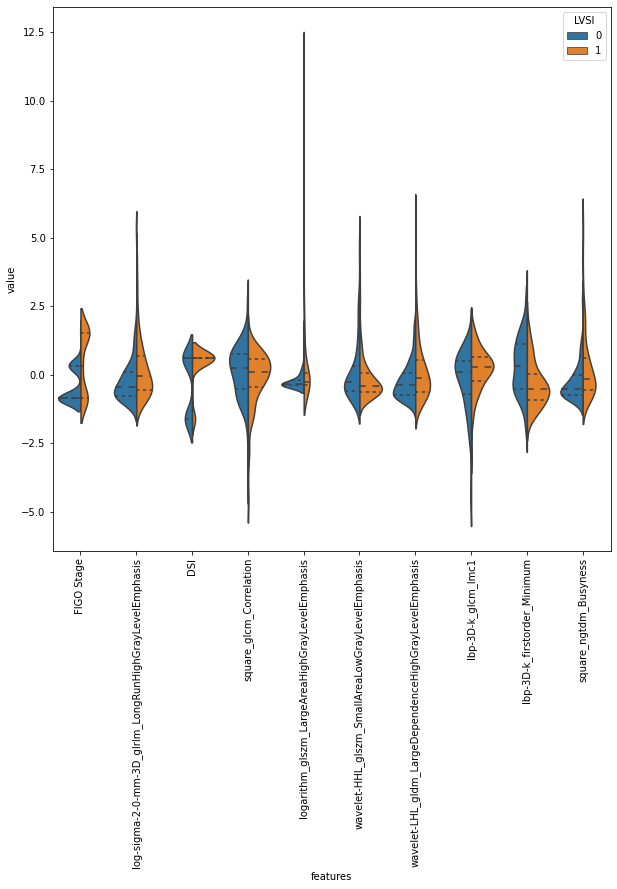

In [20]:
data_dia = y
data = x1[X_train_Lasso.columns]
data_n_2 = (data - data.mean()) / (data.std())              # 标准化
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="LVSI",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="LVSI", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

# 多的Lasso

In [21]:
print(X_train_Lasso.shape,y_train_smo.shape,X_test_Lasso.shape,y_test.shape)

(160, 12) (160,) (67, 12) (67,)


In [22]:
X_test_Lassog=X_test_Lasso
X_train_Lassog=X_train_Lasso

[[31  3]
 [13 20]]
[[25  9]
 [10 23]]
[[32  2]
 [12 21]]
[[26  8]
 [10 23]]
[[30  4]
 [15 18]]
[[31  3]
 [ 9 24]]
[[30  4]
 [12 21]]
[[30  4]
 [15 18]]


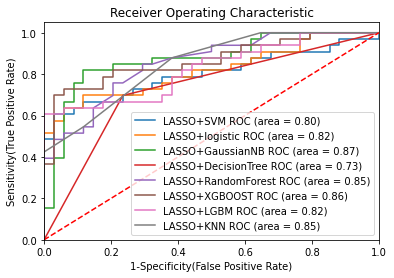

,m,AUC,SEN,SPE,ACC
0,LASSO+SVM,0.800,0.606,0.912,0.761
1,LASSO+logistic,0.817,0.697,0.735,0.716
2,LASSO+GaussianNB,0.872,0.636,0.941,0.791
3,LASSO+DecisionTree,0.731,0.697,0.765,0.731
4,LASSO+RandomForest,0.852,0.545,0.882,0.716
5,LASSO+XGBOOST,0.864,0.727,0.912,0.821
6,LASSO+LGBM,0.824,0.636,0.882,0.761
7,LASSO+KNN,0.847,0.545,0.882,0.716


In [23]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
result_model=[]
result_auc=[]
result_accuracy=[]
result_precision=[]
result_recall=[]
result_f1_score=[]
sensitivity=[]
specificity=[]
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'LASSO+SVM',
    'model': SVC(probability=True,random_state=20,class_weight='balanced'
        ),
},
{
    'label': 'LASSO+logistic',
    'model': LogisticRegression(random_state=20,
                                max_iter=100000,class_weight='balanced',
                                
                               solver='liblinear'),
        
},
{
    'label': 'LASSO+GaussianNB',
    'model': GaussianNB(),
},
{
    'label': 'LASSO+DecisionTree',
    'model': DecisionTreeClassifier(random_state=20,
                                   
                                    criterion='entropy'),
},
{
    'label': 'LASSO+RandomForest',
    'model': RandomForestClassifier(
                                    criterion = 'entropy',
                                    random_state=20),
},
{
    'label': 'LASSO+XGBOOST',
    'model': XGBClassifier(random_state=20) ,
},
    {
    'label': 'LASSO+LGBM',
    'model':lgb.LGBMClassifier(random_state=20),

},
    {
    'label': 'LASSO+KNN',
    'model':KNeighborsClassifier()
}
]
# f,ax=plt.subplots()
# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_Lasso, y_train_smo) # train the model
    y_pred=model.predict_proba(X_test_Lasso) # predict the test data
    y_pre=model.predict(X_test_Lasso)
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_Lasso)[:,1])
# Calculate Area under the curve to display on the plot
 
    aauc = metrics.roc_auc_score(y_test,model.predict_proba(X_test_Lasso)[:,1])
    result_auc.append(aauc)

    aaccuracy=metrics.accuracy_score(y_test,y_pre)
    result_accuracy.append(aaccuracy)
    apreci=metrics.precision_score(y_test,y_pre)
    result_precision.append(apreci)
    arecall=metrics.recall_score(y_test,y_pre)
    result_recall.append(arecall)
    af1_score=metrics.f1_score(y_test,y_pre)
    result_f1_score.append(af1_score)
    result_model.append(m['label'])
    confusion = confusion_matrix(y_test,y_pre)
    print(confusion )
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    a_Sensitivity=TP / float(TP+FN)
    sensitivity.append(a_Sensitivity)
    a_Specificity=TN / float(TN+FP)
    specificity.append(a_Specificity)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], aauc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()   # Display
result1={'m':result_model,
         'AUC':result_auc,
         'SEN':sensitivity,
         'SPE':specificity,
        'ACC':result_accuracy,
        #'precision':aresult_precision,
        #'recall':aresult_recall,
       # 'f1_score':aresult_f1_score
        }
frame1 = pd.DataFrame(result1)
frame1

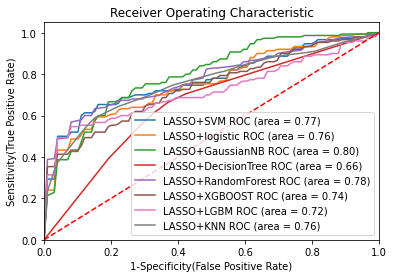

,m,K-foldAUC,95%CI,RSD,交叉验证平均Sensitivity,交叉验证平均Specificity
0,LASSO+SVM,0.773,"(0.7168956107625607, 0.8295811223808395)",0.063,0.658,0.836
1,LASSO+logistic,0.758,"(0.7071638564347086, 0.8077649184940662)",0.058,0.667,0.792
2,LASSO+GaussianNB,0.798,"(0.7554427080446533, 0.8415373489354034)",0.047,0.665,0.789
3,LASSO+DecisionTree,0.661,"(0.6417130715288354, 0.6806610975120005)",0.026,0.663,0.767
4,LASSO+RandomForest,0.780,"(0.7269550975112545, 0.8365681693453456)",0.061,0.660,0.776
5,LASSO+XGBOOST,0.739,"(0.692213669655263, 0.7875204234121633)",0.056,0.657,0.767
6,LASSO+LGBM,0.720,"(0.6584665630984294, 0.7821792108806778)",0.075,0.654,0.762
7,LASSO+KNN,0.759,"(0.6740655408745642, 0.8468271466847901)",0.099,0.652,0.766


In [24]:
data=X_train_raw
data=data[index2]
label=pd.DataFrame(y_train)
dataa=pd.concat([label,data],axis = 1)
Xp = dataa.iloc[:,1:]
yp = dataa['LVSI']

from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
plt.figure()
result_kauc=[]
result_RSD=[]
result_model=[]
result_kSensitivity=[]
result_kSpecificity=[]
CIs=[]
# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'LASSO+SVM',
    'model': SVC(probability=True,random_state=20,class_weight='balanced'
        ),
},
{
    'label': 'LASSO+logistic',
    'model': LogisticRegression(random_state=20,
                                max_iter=100000,class_weight='balanced',
                                
                               solver='liblinear'),     
},
{
    'label': 'LASSO+GaussianNB',
    'model': GaussianNB(),
},
{
    'label': 'LASSO+DecisionTree',
    'model': DecisionTreeClassifier(random_state=20,
                                   
                                    criterion='entropy'),
},
{
    'label': 'LASSO+RandomForest',
    'model': RandomForestClassifier(
                                    criterion = 'entropy',
                                    random_state=20),
},
{
    'label': 'LASSO+XGBOOST',
    'model': XGBClassifier(random_state=20) ,
},
    {
    'label': 'LASSO+LGBM',
    'model':lgb.LGBMClassifier(random_state=20),
},
     {
    'label': 'LASSO+KNN',
    'model':KNeighborsClassifier()
}
]
for m in models:
    model = m['model'] 
    #定义n折交叉验证
    tprs=[]
    aucs=[]
    kSensitivity=[]
    kSpecificity=[]
    mean_fpr=np.linspace(0,1,100)
    skFold=RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=25)
    i=0
    for train,test in skFold.split(Xp,yp):
        PX_train, PX_test = Xp.iloc[train], Xp.iloc[test]
        Py_train, Py_test = yp.iloc[train], yp.iloc[test]
        model.fit(PX_train,Py_train)
        y_pred=model.predict(PX_test)
        fpr, tpr, thresholds = metrics.roc_curve(Py_test,model.predict_proba(PX_test)[:,1])
        tprs.append(np.interp(mean_fpr,fpr,tpr))
        tprs[-1][0]=0.0
        roc_auc=auc(fpr,tpr)
        aucs.append(roc_auc)  
        confusion = confusion_matrix(Py_test,y_pred)
        TP = confusion[1, 1]
        TN = confusion[0, 0]
        FP = confusion[0, 1]
        FN = confusion[1, 0]
        k_Sensitivity=TP / float(TP+FN)
        sensitivity.append(k_Sensitivity)
        k_Specificity=TN / float(TN+FP)
        specificity.append(k_Specificity)
        i+=1
    mean_tpr=np.mean(tprs,axis=0)
    mean_tpr[-1]=1.0
    mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
    std_auc=np.std(aucs,axis=0)
    RSD=std_auc/mean_auc
    sem_auc=stats.sem(aucs,axis=0)
    CI = stats.t.interval(0.95,df=len(aucs)-1,loc=np.mean(aucs),scale=sem_auc)
    CIs.append(CI)  
    k_Sensitivity=np.mean(sensitivity)
    k_Specificity=np.mean(specificity)
    result_model.append(m['label'])
    result_kauc.append(mean_auc)
    result_RSD.append(RSD)
    result_kSensitivity.append(k_Sensitivity)
    result_kSpecificity.append(k_Specificity)
    #plt.fill_between(mean_tpr,tprs_lower,tprs_upper,color='gray',alpha=.2)
    plt.plot(mean_fpr,mean_tpr,label='%s ROC (area = %0.2f)' % (m['label'], mean_auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

resultk1={'m':result_model,
         'K-foldAUC':result_kauc,
        '95%CI':CIs,
        'RSD':result_RSD,
        '交叉验证平均Sensitivity':result_kSensitivity,
       '交叉验证平均Specificity':result_kSpecificity}
framex1= pd.DataFrame(resultk1)
framex1

# MI 取最佳前30

In [25]:
from sklearn.feature_selection import mutual_info_classif as MI
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [26]:
SKB = SelectKBest(MI,k=25)
SKB.fit(X_train_smo,y_train_smo)
SKB.scores_
SKB.get_support()
X_MI_K15=SKB.transform(X_train_smo)
X_MI_K15

array([[ 1.54625823,  0.13439401,  0.57983351, ..., -0.21575626,
        -0.72634874,  0.54999401],
       [-0.85044203,  1.04849873,  0.57983351, ...,  1.71568756,
        -0.70623879,  0.80272819],
       [ 1.54625823,  7.87151539,  0.57983351, ...,  5.13228835,
        -0.84086954,  3.29651477],
       ...,
       [ 1.54625823, -0.01393517,  0.57983351, ..., -0.18299772,
        -0.58844221,  0.01680227],
       [ 1.44757811, -0.42276854,  0.57983351, ..., -0.34896952,
         0.85466125, -0.73107025],
       [-0.66059237,  0.32019581,  0.57983351, ...,  0.10726224,
        -0.61082341,  0.05717476]])

In [27]:
X_MI_K15=pd.DataFrame(X_MI_K15,columns=X_train_smo.columns[SKB.get_support()])
X_MI_K15

,FIGO Stage,exponential_glszm_LargeAreaEmphasis,DSI,squareroot_glszm_GrayLevelNonUniformity,square_glcm_Correlation,wavelet-HLL_glcm_Imc1,logarithm_glszm_LargeAreaHighGrayLevelEmphasis,wavelet-HHH_glrlm_RunEntropy,wavelet-LLH_glszm_LargeAreaEmphasis,wavelet-LLH_glcm_InverseVariance,...,log-sigma-4-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis,wavelet-HLL_glszm_ZoneEntropy,wavelet-LLH_glszm_ZoneVariance,lbp-3D-m2_glszm_ZonePercentage,wavelet-HHL_glszm_SizeZoneNonUniformity,squareroot_glszm_LargeAreaHighGrayLevelEmphasis,wavelet-LLH_glszm_GrayLevelNonUniformity,square_ngtdm_Busyness,wavelet-LLH_ngtdm_Coarseness,log-sigma-4-0-mm-3D_gldm_DependenceNonUniformity
0,1.546,0.134,0.58,1.256,0.226,0.629,-0.180,0.068,0.138,0.888,...,0.004,0.981,0.142,-0.703,0.116,0.315,1.078,-0.216,-0.726,0.550
1,-0.850,1.048,0.58,-0.187,0.480,-0.573,-0.227,0.645,1.443,0.686,...,0.299,-0.158,1.445,-0.686,-0.602,0.661,-0.004,1.716,-0.706,0.803
2,1.546,7.872,0.58,2.898,-0.415,0.831,4.322,1.310,2.161,1.461,...,3.346,0.909,2.180,-0.812,1.653,4.818,2.612,5.132,-0.841,3.297
3,1.546,0.861,0.58,1.738,0.053,0.832,1.247,0.973,2.456,0.877,...,2.433,0.976,2.474,-0.788,1.300,2.179,1.893,0.784,-0.822,3.218
4,-0.850,-0.419,0.58,-0.703,-0.607,0.819,-0.503,0.415,-0.652,-0.400,...,-0.562,0.147,-0.652,0.759,0.056,-0.597,-0.725,-0.479,0.762,-0.742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.850,0.117,0.58,0.014,-0.342,0.776,-0.417,-0.026,-0.097,0.117,...,-0.224,0.144,-0.096,-0.530,-0.096,-0.362,-0.240,-0.004,-0.531,-0.211
156,-0.732,-0.295,-1.61,-0.346,-0.353,-1.353,-0.412,-0.026,-0.362,-0.414,...,-0.484,-0.590,-0.365,-0.212,-0.607,-0.405,-0.579,1.754,-0.133,-0.536
157,1.546,-0.014,0.58,-0.214,0.033,0.610,-0.237,0.366,-0.049,0.204,...,-0.133,0.192,-0.047,-0.579,-0.156,0.203,0.044,-0.183,-0.588,0.017
158,1.448,-0.423,0.58,-0.961,-0.290,-0.523,-0.496,-0.522,-0.624,0.044,...,-0.545,0.225,-0.626,0.908,-0.362,-0.576,-0.825,-0.349,0.855,-0.731


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

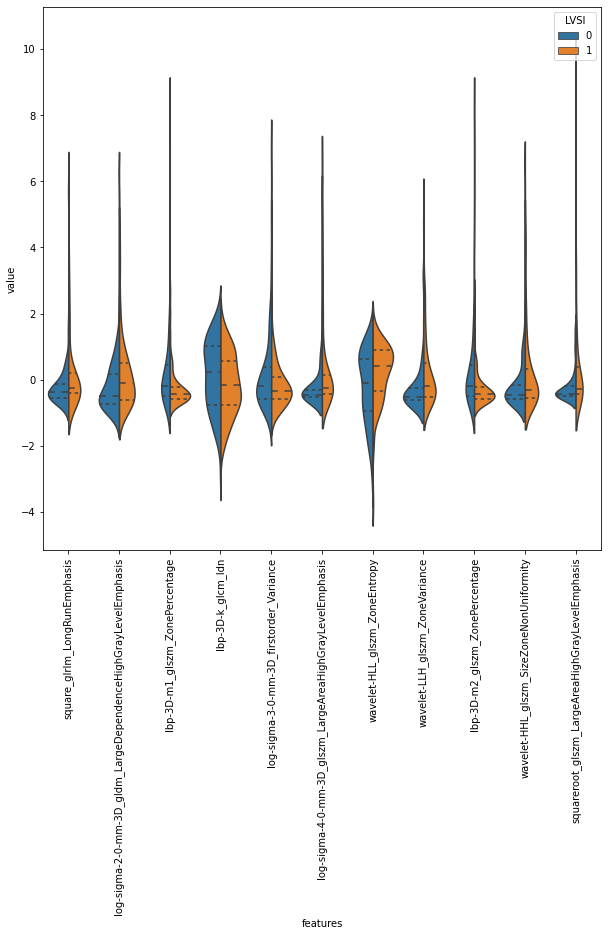

In [68]:
data_dia = y
data = x1[X_MI_K15.columns]
data_n_2 = (data - data.mean()) / (data.std())              # 标准化
data = pd.concat([y,data_n_2.iloc[:,10:21]],axis=1)
data = pd.melt(data,id_vars="LVSI",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="LVSI", data=data, split=True, inner="quart")
plt.xticks(rotation=90)

In [28]:
X_test_MI=pd.DataFrame(X_test_raw,columns=X_train_smo.columns[SKB.get_support()])
X_train_MI=X_MI_K15
X_train_MI

,FIGO Stage,exponential_glszm_LargeAreaEmphasis,DSI,squareroot_glszm_GrayLevelNonUniformity,square_glcm_Correlation,wavelet-HLL_glcm_Imc1,logarithm_glszm_LargeAreaHighGrayLevelEmphasis,wavelet-HHH_glrlm_RunEntropy,wavelet-LLH_glszm_LargeAreaEmphasis,wavelet-LLH_glcm_InverseVariance,...,log-sigma-4-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis,wavelet-HLL_glszm_ZoneEntropy,wavelet-LLH_glszm_ZoneVariance,lbp-3D-m2_glszm_ZonePercentage,wavelet-HHL_glszm_SizeZoneNonUniformity,squareroot_glszm_LargeAreaHighGrayLevelEmphasis,wavelet-LLH_glszm_GrayLevelNonUniformity,square_ngtdm_Busyness,wavelet-LLH_ngtdm_Coarseness,log-sigma-4-0-mm-3D_gldm_DependenceNonUniformity
0,1.546,0.134,0.58,1.256,0.226,0.629,-0.180,0.068,0.138,0.888,...,0.004,0.981,0.142,-0.703,0.116,0.315,1.078,-0.216,-0.726,0.550
1,-0.850,1.048,0.58,-0.187,0.480,-0.573,-0.227,0.645,1.443,0.686,...,0.299,-0.158,1.445,-0.686,-0.602,0.661,-0.004,1.716,-0.706,0.803
2,1.546,7.872,0.58,2.898,-0.415,0.831,4.322,1.310,2.161,1.461,...,3.346,0.909,2.180,-0.812,1.653,4.818,2.612,5.132,-0.841,3.297
3,1.546,0.861,0.58,1.738,0.053,0.832,1.247,0.973,2.456,0.877,...,2.433,0.976,2.474,-0.788,1.300,2.179,1.893,0.784,-0.822,3.218
4,-0.850,-0.419,0.58,-0.703,-0.607,0.819,-0.503,0.415,-0.652,-0.400,...,-0.562,0.147,-0.652,0.759,0.056,-0.597,-0.725,-0.479,0.762,-0.742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.850,0.117,0.58,0.014,-0.342,0.776,-0.417,-0.026,-0.097,0.117,...,-0.224,0.144,-0.096,-0.530,-0.096,-0.362,-0.240,-0.004,-0.531,-0.211
156,-0.732,-0.295,-1.61,-0.346,-0.353,-1.353,-0.412,-0.026,-0.362,-0.414,...,-0.484,-0.590,-0.365,-0.212,-0.607,-0.405,-0.579,1.754,-0.133,-0.536
157,1.546,-0.014,0.58,-0.214,0.033,0.610,-0.237,0.366,-0.049,0.204,...,-0.133,0.192,-0.047,-0.579,-0.156,0.203,0.044,-0.183,-0.588,0.017
158,1.448,-0.423,0.58,-0.961,-0.290,-0.523,-0.496,-0.522,-0.624,0.044,...,-0.545,0.225,-0.626,0.908,-0.362,-0.576,-0.825,-0.349,0.855,-0.731


In [29]:
X_test_MI=X_test_MI[X_train_MI.columns]
X_test_MIg=X_test_MI
X_train_MIg=X_train_MI

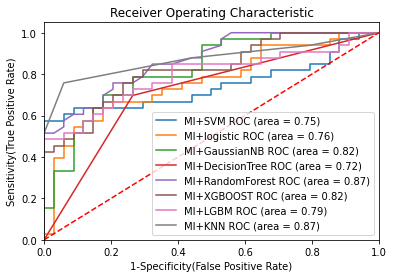

,m,AUC,SEN,SPE,ACC
0,MI+SVM,0.745,0.636,0.824,0.731
1,MI+logistic,0.763,0.697,0.676,0.687
2,MI+GaussianNB,0.821,0.545,0.882,0.716
3,MI+DecisionTree,0.716,0.697,0.735,0.716
4,MI+RandomForest,0.867,0.636,0.882,0.761
5,MI+XGBOOST,0.822,0.636,0.853,0.746
6,MI+LGBM,0.792,0.606,0.853,0.731
7,MI+KNN,0.871,0.758,0.941,0.851


In [30]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
result_model=[]
result_auc=[]
result_accuracy=[]
result_precision=[]
result_recall=[]
result_f1_score=[]
sensitivity=[]
specificity=[]
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'MI+SVM',
    'model': SVC(probability=True,random_state=20,class_weight='balanced'
        ),
},
{
    'label': 'MI+logistic',
    'model': LogisticRegression(random_state=20,
                                max_iter=100000,class_weight='balanced',
                                
                               solver='liblinear'),
        
},
{
    'label': 'MI+GaussianNB',
    'model': GaussianNB(),
},
{
    'label': 'MI+DecisionTree',
    'model': DecisionTreeClassifier(random_state=20,
                                   
                                    criterion='entropy'),
},
{
    'label': 'MI+RandomForest',
    'model': RandomForestClassifier(
                                    criterion = 'entropy',
                                    random_state=20),
},
{
    'label': 'MI+XGBOOST',
    'model': XGBClassifier(random_state=20) ,
},
    {
    'label': 'MI+LGBM',
    'model':lgb.LGBMClassifier(random_state=20),
},
    {
    'label': 'MI+KNN',
    'model':KNeighborsClassifier()
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_MI, y_train_smo) # train the model
    y_pred=model.predict_proba(X_test_MI) # predict the test data
    y_pre=model.predict(X_test_MI)
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_MI)[:,1])
# Calculate Area under the curve to display on the plot
 
    aauc = metrics.roc_auc_score(y_test,model.predict_proba(X_test_MI)[:,1])
    result_auc.append(aauc)
    aaccuracy=metrics.accuracy_score(y_test,y_pre)
    result_accuracy.append(aaccuracy)
    apreci=metrics.precision_score(y_test,y_pre)
    result_precision.append(apreci)
    arecall=metrics.recall_score(y_test,y_pre)
    result_recall.append(arecall)
    af1_score=metrics.f1_score(y_test,y_pre)
    result_f1_score.append(af1_score)
    result_model.append(m['label'])
    confusion = confusion_matrix(y_test,y_pre)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    a_Sensitivity=TP / float(TP+FN)
    sensitivity.append(a_Sensitivity)
    a_Specificity=TN / float(TN+FP)
    specificity.append(a_Specificity)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], aauc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()   # Display
result2={'m':result_model,
         'AUC':result_auc,
         'SEN':sensitivity,
         'SPE':specificity,
        'ACC':result_accuracy,
        #'precision':aresult_precision,
        #'recall':aresult_recall,
       # 'f1_score':aresult_f1_score
        }
frame2 = pd.DataFrame(result2)
frame2

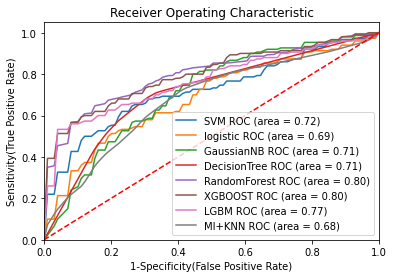

,m,K-foldAUC,95%CI,RSD,交叉验证平均Sensitivity,交叉验证平均Specificity
0,SVM,0.721,"(0.6857010365850077, 0.7558374249534537)",0.042,0.647,0.793
1,logistic,0.686,"(0.6661290507998018, 0.7041653461612617)",0.024,0.643,0.743
2,GaussianNB,0.709,"(0.6603661380583187, 0.7567563690641886)",0.059,0.610,0.747
3,DecisionTree,0.711,"(0.6493969032057931, 0.7734805896716999)",0.076,0.623,0.746
4,RandomForest,0.797,"(0.7406776776085987, 0.8566347630371752)",0.063,0.627,0.756
5,XGBOOST,0.798,"(0.7555021270629185, 0.8426365244090661)",0.048,0.634,0.757
6,LGBM,0.767,"(0.717016753222085, 0.8170383274996622)",0.057,0.635,0.757
7,MI+KNN,0.678,"(0.6144933858830539, 0.7425816378586365)",0.082,0.625,0.754


In [31]:
data=X_train_raw
data=data[X_train_MI.columns]
label=pd.DataFrame(y_train)
dataa=pd.concat([label,data],axis = 1)
Xp = dataa.iloc[:,1:]
yp = dataa['LVSI']
Xp = dataa.iloc[:,1:]
yp = dataa['LVSI']

from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
plt.figure()
result_kauc=[]
result_RSD=[]
result_model=[]
result_kSensitivity=[]
result_kSpecificity=[]
CIs=[]
# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'SVM',
    'model': SVC(probability=True,random_state=20,class_weight='balanced'
        ),
},
{
    'label': 'logistic',
    'model': LogisticRegression(random_state=20,
                                max_iter=100000,class_weight='balanced',
                                
                               solver='liblinear'),
        
},
{
    'label': 'GaussianNB',
    'model': GaussianNB(),
},
{
    'label': 'DecisionTree',
    'model': DecisionTreeClassifier(random_state=20,
                                   
                                    criterion='entropy'),
},
{
    'label': 'RandomForest',
    'model': RandomForestClassifier(
                                    criterion = 'entropy',
                                    random_state=20),
},
{
    'label': 'XGBOOST',
    'model': XGBClassifier(random_state=20) ,
},
    {
    'label': 'LGBM',
    'model':lgb.LGBMClassifier(random_state=20),
},
    {
    'label': 'MI+KNN',
    'model':KNeighborsClassifier()
}
]
for m in models:
    model = m['model'] 
    #定义n折交叉验证
    tprs=[]
    aucs=[]
    kSensitivity=[]
    kSpecificity=[]
    mean_fpr=np.linspace(0,1,100)
    skFold=RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=25)
    i=0
    for train,test in skFold.split(Xp,yp):
        PX_train, PX_test = Xp.iloc[train], Xp.iloc[test]
        Py_train, Py_test = yp.iloc[train], yp.iloc[test]
        model.fit(PX_train,Py_train)
        y_pred=model.predict(PX_test)
        fpr, tpr, thresholds = metrics.roc_curve(Py_test,model.predict_proba(PX_test)[:,1])
        tprs.append(np.interp(mean_fpr,fpr,tpr))
        tprs[-1][0]=0.0
        roc_auc=auc(fpr,tpr)
        aucs.append(roc_auc)  
        confusion = confusion_matrix(Py_test,y_pred)
        TP = confusion[1, 1]
        TN = confusion[0, 0]
        FP = confusion[0, 1]
        FN = confusion[1, 0]
        k_Sensitivity=TP / float(TP+FN)
        sensitivity.append(k_Sensitivity)
        k_Specificity=TN / float(TN+FP)
        specificity.append(k_Specificity)
        i+=1
    mean_tpr=np.mean(tprs,axis=0)
    mean_tpr[-1]=1.0
    mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
    std_auc=np.std(aucs,axis=0)
    RSD=std_auc/mean_auc
    sem_auc=stats.sem(aucs,axis=0)
    CI = stats.t.interval(0.95,df=len(aucs)-1,loc=np.mean(aucs),scale=sem_auc)
    CIs.append(CI)  
    k_Sensitivity=np.mean(sensitivity)
    k_Specificity=np.mean(specificity)
    result_model.append(m['label'])
    result_kauc.append(mean_auc)
    result_RSD.append(RSD)
    result_kSensitivity.append(k_Sensitivity)
    result_kSpecificity.append(k_Specificity)
    #plt.fill_between(mean_tpr,tprs_lower,tprs_upper,color='gray',alpha=.2)
    plt.plot(mean_fpr,mean_tpr,label='%s ROC (area = %0.2f)' % (m['label'], mean_auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

resultk2={'m':result_model,
         'K-foldAUC':result_kauc,
        '95%CI':CIs,
        'RSD':result_RSD,
        '交叉验证平均Sensitivity':result_kSensitivity,
       '交叉验证平均Specificity':result_kSpecificity}
framex2= pd.DataFrame(resultk2)
framex2

# MIC方法

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif as MIC
filter_data = SelectKBest(MIC, k=25)
filter_data.fit_transform(X_train_smo, y_train_smo)
filter_data.scores_
filter_data.get_support()
X_MIC_K20=filter_data.transform(X_train_smo)
X_MIC_K20

array([[ 1.54625823,  0.13439401,  1.25552437, ..., -0.21575626,
        -0.72634874,  0.54999401],
       [-0.85044203,  1.04849873, -0.18733395, ...,  1.71568756,
        -0.70623879,  0.80272819],
       [ 1.54625823,  7.87151539,  2.89785075, ...,  5.13228835,
        -0.84086954,  3.29651477],
       ...,
       [ 1.54625823, -0.01393517, -0.21440066, ..., -0.18299772,
        -0.58844221,  0.01680227],
       [ 1.44757811, -0.42276854, -0.96114994, ..., -0.34896952,
         0.85466125, -0.73107025],
       [-0.66059237,  0.32019581,  0.16377282, ...,  0.10726224,
        -0.61082341,  0.05717476]])

In [33]:
X_MIC_K20=pd.DataFrame(X_MIC_K20,columns=X_train_smo.columns[filter_data.get_support()])
X_MIC_K20

,FIGO Stage,exponential_glszm_LargeAreaEmphasis,squareroot_glszm_GrayLevelNonUniformity,square_glcm_Correlation,wavelet-HLL_glcm_Imc1,logarithm_glszm_LargeAreaHighGrayLevelEmphasis,wavelet-HHH_glrlm_RunEntropy,wavelet-LLH_glszm_LargeAreaEmphasis,log-sigma-4-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis,wavelet-LLH_glcm_InverseVariance,...,log-sigma-4-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis,wavelet-HLL_glszm_ZoneEntropy,wavelet-LLH_glszm_ZoneVariance,lbp-3D-m2_glszm_ZonePercentage,wavelet-HHL_glszm_SizeZoneNonUniformity,squareroot_glszm_LargeAreaHighGrayLevelEmphasis,wavelet-LLH_glszm_GrayLevelNonUniformity,square_ngtdm_Busyness,wavelet-LLH_ngtdm_Coarseness,log-sigma-4-0-mm-3D_gldm_DependenceNonUniformity
0,1.546,0.134,1.256,0.226,0.629,-0.180,0.068,0.138,-0.172,0.888,...,0.004,0.981,0.142,-0.703,0.116,0.315,1.078,-0.216,-0.726,0.550
1,-0.850,1.048,-0.187,0.480,-0.573,-0.227,0.645,1.443,0.214,0.686,...,0.299,-0.158,1.445,-0.686,-0.602,0.661,-0.004,1.716,-0.706,0.803
2,1.546,7.872,2.898,-0.415,0.831,4.322,1.310,2.161,3.129,1.461,...,3.346,0.909,2.180,-0.812,1.653,4.818,2.612,5.132,-0.841,3.297
3,1.546,0.861,1.738,0.053,0.832,1.247,0.973,2.456,1.298,0.877,...,2.433,0.976,2.474,-0.788,1.300,2.179,1.893,0.784,-0.822,3.218
4,-0.850,-0.419,-0.703,-0.607,0.819,-0.503,0.415,-0.652,-0.512,-0.400,...,-0.562,0.147,-0.652,0.759,0.056,-0.597,-0.725,-0.479,0.762,-0.742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.850,0.117,0.014,-0.342,0.776,-0.417,-0.026,-0.097,0.423,0.117,...,-0.224,0.144,-0.096,-0.530,-0.096,-0.362,-0.240,-0.004,-0.531,-0.211
156,-0.732,-0.295,-0.346,-0.353,-1.353,-0.412,-0.026,-0.362,-0.660,-0.414,...,-0.484,-0.590,-0.365,-0.212,-0.607,-0.405,-0.579,1.754,-0.133,-0.536
157,1.546,-0.014,-0.214,0.033,0.610,-0.237,0.366,-0.049,-0.021,0.204,...,-0.133,0.192,-0.047,-0.579,-0.156,0.203,0.044,-0.183,-0.588,0.017
158,1.448,-0.423,-0.961,-0.290,-0.523,-0.496,-0.522,-0.624,-0.598,0.044,...,-0.545,0.225,-0.626,0.908,-0.362,-0.576,-0.825,-0.349,0.855,-0.731


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

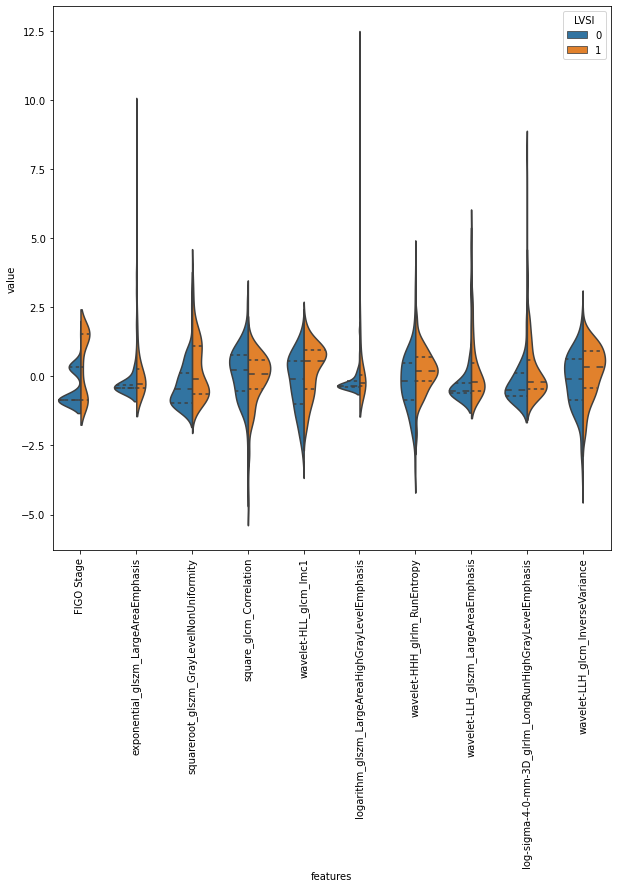

In [66]:
data_dia = y
data = x1[X_MIC_K20.columns]
data_n_2 = (data - data.mean()) / (data.std())              # 标准化
data = pd.concat([y,data_n_2.iloc[:,:10]],axis=1)
data = pd.melt(data,id_vars="LVSI",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="LVSI", data=data, split=True, inner="quart")
plt.xticks(rotation=90)

In [34]:
X_test_MIC=pd.DataFrame(X_test_raw,columns=X_train_smo.columns[filter_data.get_support()])
X_train_MIC=X_MIC_K20
X_train_MIC

,FIGO Stage,exponential_glszm_LargeAreaEmphasis,squareroot_glszm_GrayLevelNonUniformity,square_glcm_Correlation,wavelet-HLL_glcm_Imc1,logarithm_glszm_LargeAreaHighGrayLevelEmphasis,wavelet-HHH_glrlm_RunEntropy,wavelet-LLH_glszm_LargeAreaEmphasis,log-sigma-4-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis,wavelet-LLH_glcm_InverseVariance,...,log-sigma-4-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis,wavelet-HLL_glszm_ZoneEntropy,wavelet-LLH_glszm_ZoneVariance,lbp-3D-m2_glszm_ZonePercentage,wavelet-HHL_glszm_SizeZoneNonUniformity,squareroot_glszm_LargeAreaHighGrayLevelEmphasis,wavelet-LLH_glszm_GrayLevelNonUniformity,square_ngtdm_Busyness,wavelet-LLH_ngtdm_Coarseness,log-sigma-4-0-mm-3D_gldm_DependenceNonUniformity
0,1.546,0.134,1.256,0.226,0.629,-0.180,0.068,0.138,-0.172,0.888,...,0.004,0.981,0.142,-0.703,0.116,0.315,1.078,-0.216,-0.726,0.550
1,-0.850,1.048,-0.187,0.480,-0.573,-0.227,0.645,1.443,0.214,0.686,...,0.299,-0.158,1.445,-0.686,-0.602,0.661,-0.004,1.716,-0.706,0.803
2,1.546,7.872,2.898,-0.415,0.831,4.322,1.310,2.161,3.129,1.461,...,3.346,0.909,2.180,-0.812,1.653,4.818,2.612,5.132,-0.841,3.297
3,1.546,0.861,1.738,0.053,0.832,1.247,0.973,2.456,1.298,0.877,...,2.433,0.976,2.474,-0.788,1.300,2.179,1.893,0.784,-0.822,3.218
4,-0.850,-0.419,-0.703,-0.607,0.819,-0.503,0.415,-0.652,-0.512,-0.400,...,-0.562,0.147,-0.652,0.759,0.056,-0.597,-0.725,-0.479,0.762,-0.742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.850,0.117,0.014,-0.342,0.776,-0.417,-0.026,-0.097,0.423,0.117,...,-0.224,0.144,-0.096,-0.530,-0.096,-0.362,-0.240,-0.004,-0.531,-0.211
156,-0.732,-0.295,-0.346,-0.353,-1.353,-0.412,-0.026,-0.362,-0.660,-0.414,...,-0.484,-0.590,-0.365,-0.212,-0.607,-0.405,-0.579,1.754,-0.133,-0.536
157,1.546,-0.014,-0.214,0.033,0.610,-0.237,0.366,-0.049,-0.021,0.204,...,-0.133,0.192,-0.047,-0.579,-0.156,0.203,0.044,-0.183,-0.588,0.017
158,1.448,-0.423,-0.961,-0.290,-0.523,-0.496,-0.522,-0.624,-0.598,0.044,...,-0.545,0.225,-0.626,0.908,-0.362,-0.576,-0.825,-0.349,0.855,-0.731


In [35]:
X_test_MIC = X_test_MIC[X_train_MIC.columns]
X_test_MIg=X_test_MIC
X_train_MIg=X_train_MIC

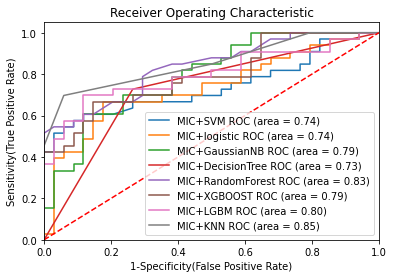

,m,AUC,SEN,SPE,ACC
0,MIC+SVM,0.739,0.606,0.824,0.716
1,MIC+logistic,0.735,0.697,0.588,0.642
2,MIC+GaussianNB,0.794,0.515,0.882,0.701
3,MIC+DecisionTree,0.731,0.727,0.735,0.731
4,MIC+RandomForest,0.835,0.576,0.882,0.731
5,MIC+XGBOOST,0.794,0.576,0.853,0.716
6,MIC+LGBM,0.799,0.576,0.882,0.731
7,MIC+KNN,0.852,0.697,0.941,0.821


In [36]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
result_model=[]
result_auc=[]
result_accuracy=[]
result_precision=[]
result_recall=[]
result_f1_score=[]
sensitivity=[]
specificity=[]
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'MIC+SVM',
    'model': SVC(probability=True,random_state=20,class_weight='balanced'
        ),
},
{
    'label': 'MIC+logistic',
    'model': LogisticRegression(random_state=20,
                                max_iter=100000,class_weight='balanced',
                                
                               solver='liblinear'),
        
},
{
    'label': 'MIC+GaussianNB',
    'model': GaussianNB(),
},
{
    'label': 'MIC+DecisionTree',
    'model': DecisionTreeClassifier(random_state=20,
                                   
                                    criterion='entropy'),
},
{
    'label': 'MIC+RandomForest',
    'model': RandomForestClassifier(
                                    criterion = 'entropy',
                                    random_state=20),
},
{
    'label': 'MIC+XGBOOST',
    'model': XGBClassifier(random_state=20) ,
},
    {
    'label': 'MIC+LGBM',
    'model':lgb.LGBMClassifier(random_state=20),
},
    {
    'label': 'MIC+KNN',
    'model':KNeighborsClassifier()
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_MIC, y_train_smo) # train the model
    y_pred=model.predict_proba(X_test_MIC) # predict the test data
    y_pre=model.predict(X_test_MIC)
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_MIC)[:,1])
# Calculate Area under the curve to display on the plot
 
    aauc = metrics.roc_auc_score(y_test,model.predict_proba(X_test_MIC)[:,1])
    result_auc.append(aauc)
    aaccuracy=metrics.accuracy_score(y_test,y_pre)
    result_accuracy.append(aaccuracy)
    apreci=metrics.precision_score(y_test,y_pre)
    result_precision.append(apreci)
    arecall=metrics.recall_score(y_test,y_pre)
    result_recall.append(arecall)
    af1_score=metrics.f1_score(y_test,y_pre)
    result_f1_score.append(af1_score)
    result_model.append(m['label'])
    confusion = confusion_matrix(y_test,y_pre)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    a_Sensitivity=TP / float(TP+FN)
    sensitivity.append(a_Sensitivity)
    a_Specificity=TN / float(TN+FP)
    specificity.append(a_Specificity)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], aauc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()   # Display
result2={'m':result_model,
         'AUC':result_auc,
         'SEN':sensitivity,
         'SPE':specificity,
        'ACC':result_accuracy,
        #'precision':aresult_precision,
        #'recall':aresult_recall,
       # 'f1_score':aresult_f1_score
        }
frame6 = pd.DataFrame(result2)
frame6

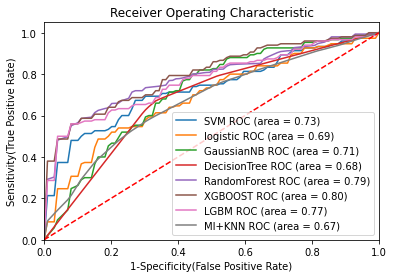

,m,K-foldAUC,95%CI,RSD,交叉验证平均Sensitivity,交叉验证平均Specificity
0,SVM,0.733,"(0.6980325058449892, 0.7672666394541559)",0.041,0.629,0.789
1,logistic,0.689,"(0.6612238517967199, 0.7151294245565563)",0.034,0.628,0.751
2,GaussianNB,0.711,"(0.6474462089785951, 0.7730761082103887)",0.077,0.599,0.751
3,DecisionTree,0.682,"(0.6209947887487036, 0.743117272030024)",0.078,0.622,0.731
4,RandomForest,0.785,"(0.7416474356368584, 0.830992640336551)",0.049,0.627,0.739
5,XGBOOST,0.799,"(0.759010288584316, 0.8414835385761781)",0.045,0.633,0.741
6,LGBM,0.770,"(0.7219036335490436, 0.8193689210568442)",0.055,0.634,0.741
7,MI+KNN,0.672,"(0.612209701100139, 0.7325481336576959)",0.078,0.624,0.739


In [37]:
data=X_train_raw
data=data[X_train_MIC.columns]
label=pd.DataFrame(y_train)
dataa=pd.concat([label,data],axis = 1)
Xp = dataa.iloc[:,1:]
yp = dataa['LVSI']
Xp = dataa.iloc[:,1:]
yp = dataa['LVSI']

from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
plt.figure()
result_kauc=[]
result_RSD=[]
result_model=[]
result_kSensitivity=[]
result_kSpecificity=[]
CIs=[]
# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'SVM',
    'model': SVC(probability=True,random_state=20,class_weight='balanced'
        ),
},
{
    'label': 'logistic',
    'model': LogisticRegression(random_state=20,
                                max_iter=100000,class_weight='balanced',
                                
                               solver='liblinear'),
        
},
{
    'label': 'GaussianNB',
    'model': GaussianNB(),
},
{
    'label': 'DecisionTree',
    'model': DecisionTreeClassifier(random_state=20,
                                   
                                    criterion='entropy'),
},
{
    'label': 'RandomForest',
    'model': RandomForestClassifier(
                                    criterion = 'entropy',
                                    random_state=20),
},
{
    'label': 'XGBOOST',
    'model': XGBClassifier(random_state=20) ,
},
    {
    'label': 'LGBM',
    'model':lgb.LGBMClassifier(random_state=20),
},
    {
    'label': 'MI+KNN',
    'model':KNeighborsClassifier()
}
]
for m in models:
    model = m['model'] 
    #定义n折交叉验证
    tprs=[]
    aucs=[]
    kSensitivity=[]
    kSpecificity=[]
    mean_fpr=np.linspace(0,1,100)
    skFold=RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=25)
    i=0
    for train,test in skFold.split(Xp,yp):
        PX_train, PX_test = Xp.iloc[train], Xp.iloc[test]
        Py_train, Py_test = yp.iloc[train], yp.iloc[test]
        model.fit(PX_train,Py_train)
        y_pred=model.predict(PX_test)
        fpr, tpr, thresholds = metrics.roc_curve(Py_test,model.predict_proba(PX_test)[:,1])
        tprs.append(np.interp(mean_fpr,fpr,tpr))
        tprs[-1][0]=0.0
        roc_auc=auc(fpr,tpr)
        aucs.append(roc_auc)  
        confusion = confusion_matrix(Py_test,y_pred)
        TP = confusion[1, 1]
        TN = confusion[0, 0]
        FP = confusion[0, 1]
        FN = confusion[1, 0]
        k_Sensitivity=TP / float(TP+FN)
        sensitivity.append(k_Sensitivity)
        k_Specificity=TN / float(TN+FP)
        specificity.append(k_Specificity)
        i+=1
    mean_tpr=np.mean(tprs,axis=0)
    mean_tpr[-1]=1.0
    mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
    std_auc=np.std(aucs,axis=0)
    RSD=std_auc/mean_auc
    sem_auc=stats.sem(aucs,axis=0)
    CI = stats.t.interval(0.95,df=len(aucs)-1,loc=np.mean(aucs),scale=sem_auc)
    CIs.append(CI)  
    k_Sensitivity=np.mean(sensitivity)
    k_Specificity=np.mean(specificity)
    result_model.append(m['label'])
    result_kauc.append(mean_auc)
    result_RSD.append(RSD)
    result_kSensitivity.append(k_Sensitivity)
    result_kSpecificity.append(k_Specificity)
    #plt.fill_between(mean_tpr,tprs_lower,tprs_upper,color='gray',alpha=.2)
    plt.plot(mean_fpr,mean_tpr,label='%s ROC (area = %0.2f)' % (m['label'], mean_auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

resultk2={'m':result_model,
         'K-foldAUC':result_kauc,
        '95%CI':CIs,
        'RSD':result_RSD,
        '交叉验证平均Sensitivity':result_kSensitivity,
       '交叉验证平均Specificity':result_kSpecificity}
framex6= pd.DataFrame(resultk2)
framex6

# RFE 20个

In [38]:
from sklearn.feature_selection import RFE
RFC=RandomForestClassifier(n_estimators=15,random_state=20)
selector_RFE=RFE(RFC,n_features_to_select=20,step=1).fit(X_train_smo,y_train_smo)
X_train_Rfe=X_train_smo[X_train_smo.columns[selector_RFE.support_]]
X_train_Rfe

,FIGO Stage,wavelet-LLL_firstorder_RobustMeanAbsoluteDeviation,square_glcm_Correlation,log-sigma-3-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis,logarithm_glszm_LargeAreaHighGrayLevelEmphasis,squareroot_ngtdm_Busyness,wavelet-LLH_glszm_LargeAreaEmphasis,wavelet-HHL_glszm_SmallAreaLowGrayLevelEmphasis,log-sigma-4-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis,wavelet-LLH_glcm_InverseVariance,square_glrlm_LongRunEmphasis,log-sigma-2-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis,log-sigma-2-0-mm-3D_glrlm_RunVariance,lbp-3D-k_firstorder_Minimum,wavelet-HLL_glszm_ZoneEntropy,wavelet-LLL_firstorder_InterquartileRange,wavelet-HHH_ngtdm_Coarseness,lbp-3D-m2_firstorder_Kurtosis,wavelet-LLH_firstorder_MeanAbsoluteDeviation,wavelet-LHL_glszm_SizeZoneNonUniformity
0,1.546,-0.209,0.226,0.254,-0.180,0.212,0.138,-0.508,-0.172,0.888,-0.399,0.379,0.765,-0.955,0.981,-0.217,-0.704,-0.593,-0.316,0.223
1,-0.850,-0.777,0.480,-0.338,-0.227,1.660,1.443,1.036,0.214,0.686,-0.094,-0.704,1.128,-0.285,-0.158,-0.773,-0.682,0.544,-0.884,-0.538
2,1.546,-0.701,-0.415,1.370,4.322,0.124,2.161,-0.712,3.129,1.461,2.671,-0.029,1.574,-1.357,0.909,-0.684,-0.813,-0.801,-0.611,1.367
3,1.546,-0.435,0.053,0.144,1.247,-0.063,2.456,-0.721,1.298,0.877,2.827,0.354,1.929,-1.362,0.976,-0.483,-0.789,-0.580,-0.989,0.834
4,-0.850,-0.308,-0.607,-0.726,-0.503,-0.632,-0.652,-0.586,-0.512,-0.400,-0.604,-0.840,-0.878,0.986,0.147,-0.466,0.791,-1.052,1.365,0.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.850,-0.708,-0.342,0.365,-0.417,0.186,-0.097,-0.436,0.423,0.117,0.384,0.269,0.554,-0.469,0.144,-0.709,-0.535,-1.069,-0.474,0.052
156,-0.732,-0.559,-0.353,-0.894,-0.412,-0.478,-0.362,1.383,-0.660,-0.414,-0.087,-0.853,-0.097,0.321,-0.590,-0.553,-0.188,1.491,-0.652,-0.662
157,1.546,-0.649,0.033,-0.204,-0.237,0.181,-0.049,-0.205,-0.021,0.204,-0.064,-0.086,0.958,-0.982,0.192,-0.673,-0.582,-0.565,-0.470,-0.076
158,1.448,0.937,-0.290,-0.339,-0.496,-0.655,-0.624,-0.493,-0.598,0.044,-0.390,-0.595,-0.835,-0.982,0.225,1.026,0.882,-0.451,-0.019,-0.483


In [39]:
X_test_Rfe=pd.DataFrame(X_test_raw,columns=X_train_smo.columns[selector_RFE.support_])
X_test_Rfe

,FIGO Stage,wavelet-LLL_firstorder_RobustMeanAbsoluteDeviation,square_glcm_Correlation,log-sigma-3-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis,logarithm_glszm_LargeAreaHighGrayLevelEmphasis,squareroot_ngtdm_Busyness,wavelet-LLH_glszm_LargeAreaEmphasis,wavelet-HHL_glszm_SmallAreaLowGrayLevelEmphasis,log-sigma-4-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis,wavelet-LLH_glcm_InverseVariance,square_glrlm_LongRunEmphasis,log-sigma-2-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis,log-sigma-2-0-mm-3D_glrlm_RunVariance,lbp-3D-k_firstorder_Minimum,wavelet-HLL_glszm_ZoneEntropy,wavelet-LLL_firstorder_InterquartileRange,wavelet-HHH_ngtdm_Coarseness,lbp-3D-m2_firstorder_Kurtosis,wavelet-LLH_firstorder_MeanAbsoluteDeviation,wavelet-LHL_glszm_SizeZoneNonUniformity
0,1.546,0.111,0.206,-0.276,-0.495,-3.271e-01,-0.580,-0.490,-0.529,1.005,-0.618,0.176,-0.773,0.312,0.422,0.090,-0.112,0.594,0.294,0.171
1,1.546,-0.480,-0.072,0.669,16.280,6.513e-01,2.792,-0.695,1.657,0.735,-0.288,1.880,1.390,-1.469,0.984,-0.477,-0.840,-1.257,-0.619,3.833
2,-0.850,0.533,0.359,0.266,-0.507,-4.558e-01,-0.526,-0.515,-0.271,-0.234,-0.539,0.894,-0.826,0.863,0.055,0.495,-0.228,1.848,0.123,-0.346
3,-0.850,0.541,0.497,-0.377,-0.520,-5.788e-01,-0.654,-0.491,-0.429,0.913,-0.677,-0.552,-1.154,-0.545,0.212,0.601,1.362,-0.328,0.678,-0.176
4,1.546,0.446,0.362,-0.519,-0.326,-3.818e-01,-0.211,-0.586,-0.332,-2.023,-0.330,-0.447,-0.498,-0.390,0.910,0.475,-0.628,-0.582,0.166,0.741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.348,0.622,-0.095,-0.739,-0.523,-5.806e-01,-0.663,-0.285,-0.698,0.913,-0.598,-0.868,-1.100,1.478,-1.105,0.562,5.337,-1.416,0.643,-0.634
63,-0.850,-0.032,0.677,-0.810,-0.509,2.109e-04,-0.544,-0.770,-0.650,0.938,-0.229,-0.816,-0.221,1.781,-1.874,-0.004,0.321,0.676,-0.038,-0.727
64,0.348,-0.523,0.715,0.167,0.048,7.581e-01,0.776,0.320,0.438,0.849,-0.212,0.034,0.476,-0.211,0.660,-0.554,-0.763,0.738,-0.360,-0.129
65,-0.850,-0.818,-1.323,-0.423,-0.425,-5.070e-01,-0.423,0.756,-0.494,0.190,0.621,-0.504,0.052,0.767,-0.269,-0.779,-0.166,-0.825,-0.440,-0.371


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

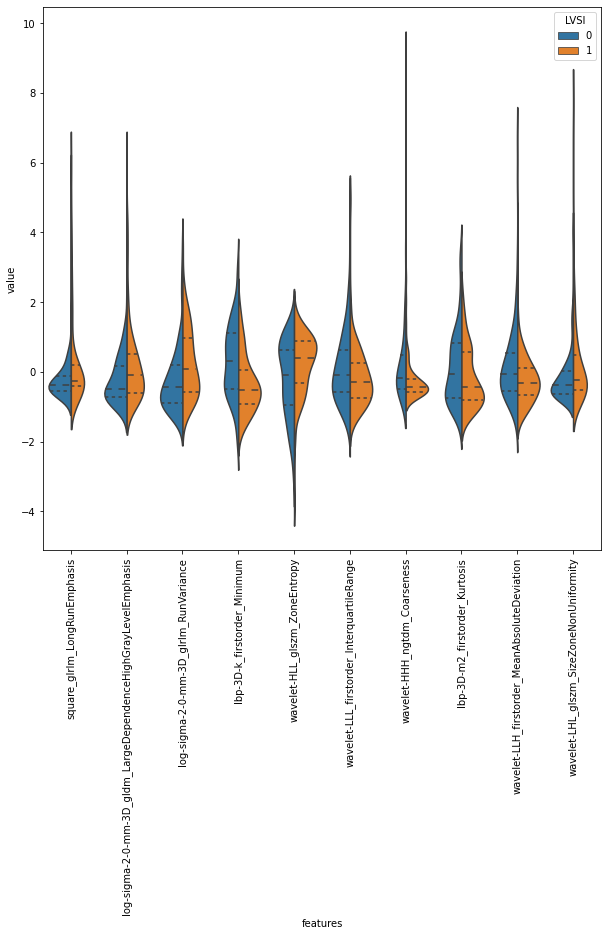

In [64]:
data_dia = y
data = x1[X_test_Rfe.columns]
data_n_2 = (data - data.mean()) / (data.std())              # 标准化
data = pd.concat([y,data_n_2.iloc[:,10:21]],axis=1)
data = pd.melt(data,id_vars="LVSI",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="LVSI", data=data, split=True, inner="quart")
plt.xticks(rotation=90)

In [40]:
X_test_Rfe=X_test_Rfe[X_train_Rfe.columns]
print(X_train_Rfe.shape,y_train_smo.shape,X_test_Rfe.shape,y_test.shape)
X_test_RFEg=X_test_Rfe
X_train_RFEg=X_train_Rfe

(160, 20) (160,) (67, 20) (67,)


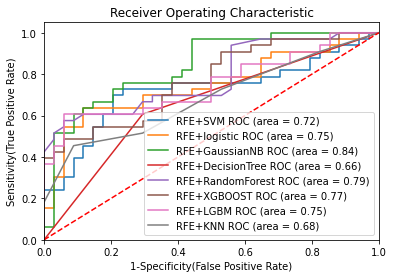

,m,AUC,SEN,SPE,ACC
0,RFE+SVM,0.721,0.667,0.794,0.731
1,RFE+logistic,0.747,0.636,0.706,0.672
2,RFE+GaussianNB,0.840,0.667,0.824,0.746
3,RFE+DecisionTree,0.656,0.606,0.706,0.657
4,RFE+RandomForest,0.786,0.606,0.824,0.716
5,RFE+XGBOOST,0.768,0.515,0.853,0.687
6,RFE+LGBM,0.751,0.606,0.824,0.716
7,RFE+KNN,0.683,0.515,0.706,0.612


In [41]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
result_model=[]
result_auc=[]
result_accuracy=[]
result_precision=[]
result_recall=[]
result_f1_score=[]
sensitivity=[]
specificity=[]
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'RFE+SVM',
    'model': SVC(probability=True,random_state=20,class_weight='balanced'
        ),
},
{
    'label': 'RFE+logistic',
    'model': LogisticRegression(random_state=20,
                                max_iter=100000,class_weight='balanced',
                                
                               solver='liblinear'),
        
},
{
    'label': 'RFE+GaussianNB',
    'model': GaussianNB(),
},
{
    'label': 'RFE+DecisionTree',
    'model': DecisionTreeClassifier(random_state=20,
                                   
                                    criterion='entropy'),
},
{
    'label': 'RFE+RandomForest',
    'model': RandomForestClassifier(
                                    criterion = 'entropy',
                                    random_state=20),
},
{
    'label': 'RFE+XGBOOST',
    'model': XGBClassifier(random_state=20) ,
},
    {
    'label': 'RFE+LGBM',
    'model':lgb.LGBMClassifier(random_state=20),
},

    {
    'label': 'RFE+KNN',
    'model':KNeighborsClassifier()
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_Rfe, y_train_smo) # train the model
    y_pred=model.predict_proba(X_test_Rfe) # predict the test data
    y_pre=model.predict(X_test_Rfe)
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_Rfe)[:,1])
# Calculate Area under the curve to display on the plot
 
    aauc = metrics.roc_auc_score(y_test,model.predict_proba(X_test_Rfe)[:,1])
    result_auc.append(aauc)
    aaccuracy=metrics.accuracy_score(y_test,y_pre)
    result_accuracy.append(aaccuracy)
    apreci=metrics.precision_score(y_test,y_pre)
    result_precision.append(apreci)
    arecall=metrics.recall_score(y_test,y_pre)
    result_recall.append(arecall)
    af1_score=metrics.f1_score(y_test,y_pre)
    result_f1_score.append(af1_score)
    result_model.append(m['label'])
    confusion = confusion_matrix(y_test,y_pre)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    a_Sensitivity=TP / float(TP+FN)
    sensitivity.append(a_Sensitivity)
    a_Specificity=TN / float(TN+FP)
    specificity.append(a_Specificity)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], aauc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()   # Display
result3={'m':result_model,
         'AUC':result_auc,
         'SEN':sensitivity,
         'SPE':specificity,
        'ACC':result_accuracy,
        #'precision':aresult_precision,
        #'recall':aresult_recall,
       # 'f1_score':aresult_f1_score
        }
frame3 = pd.DataFrame(result3)
frame3

     LVSI  FIGO Stage  wavelet-LLL_firstorder_RobustMeanAbsoluteDeviation  \
0       1       1.546                                             -0.209    
1       1      -0.850                                             -0.777    
2       1       1.546                                             -0.701    
3       1       1.546                                             -0.435    
4       1      -0.850                                             -0.308    
..    ...         ...                                                ...    
150     0      -0.850                                              1.836    
151     0      -0.850                                              0.201    
152     0       0.348                                             -0.334    
153     0      -0.850                                             -0.713    
154     0      -0.850                                              1.215    

     square_glcm_Correlation  \
0                      0.226   
1          

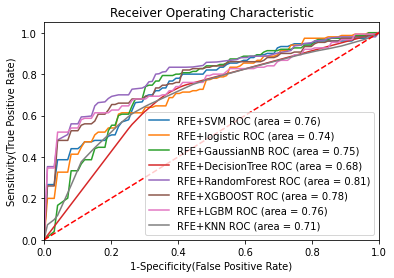

,m,K-foldAUC,95%CI,RSD,交叉验证平均Sensitivity,交叉验证平均Specificity
0,RFE+SVM,0.756,"(0.6948045826853562, 0.8190605645131241)",0.071,0.618,0.761
1,RFE+logistic,0.737,"(0.6728971314994627, 0.8016327830304517)",0.076,0.623,0.735
2,RFE+GaussianNB,0.745,"(0.6751332472475179, 0.8139740651931279)",0.081,0.627,0.740
3,RFE+DecisionTree,0.685,"(0.6235798235795431, 0.7459928259931066)",0.078,0.644,0.723
4,RFE+RandomForest,0.806,"(0.7685207496380603, 0.846170608386631)",0.042,0.652,0.733
5,RFE+XGBOOST,0.777,"(0.7552239776603039, 0.800369564599905)",0.025,0.655,0.737
6,RFE+LGBM,0.764,"(0.7256122707240493, 0.80356151844974)",0.044,0.652,0.737
7,RFE+KNN,0.705,"(0.6403661986569169, 0.7702225952652102)",0.080,0.646,0.740


In [42]:
data=X_train_raw
data=data[X_train_Rfe.columns]
label=pd.DataFrame(y_train)
dataa=pd.concat([label,data],axis = 1)
print(dataa)

Xp = dataa.iloc[:,1:]
yp = dataa['LVSI']

from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
plt.figure()
result_kauc=[]
result_RSD=[]
result_model=[]
result_kSensitivity=[]
result_kSpecificity=[]
CIs=[]
# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'RFE+SVM',
    'model': SVC(probability=True,random_state=20,class_weight='balanced'
        ),
},
{
    'label': 'RFE+logistic',
    'model': LogisticRegression(random_state=20,
                                max_iter=100000,class_weight='balanced',
                                
                               solver='liblinear'),
        
},
{
    'label': 'RFE+GaussianNB',
    'model': GaussianNB(),
},
{
    'label': 'RFE+DecisionTree',
    'model': DecisionTreeClassifier(random_state=20,
                                   
                                    criterion='entropy'),
},
{
    'label': 'RFE+RandomForest',
    'model': RandomForestClassifier(
                                    criterion = 'entropy',
                                    random_state=20),
},
{
    'label': 'RFE+XGBOOST',
    'model': XGBClassifier(random_state=20) ,
},
    {
    'label': 'RFE+LGBM',
    'model':lgb.LGBMClassifier(random_state=20),
},
    {
    'label': 'RFE+KNN',
    'model':KNeighborsClassifier()
}
]
for m in models:
    model = m['model'] 
    #定义n折交叉验证
    tprs=[]
    aucs=[]
    kSensitivity=[]
    kSpecificity=[]
    mean_fpr=np.linspace(0,1,100)
    skFold=RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=25)
    i=0
    for train,test in skFold.split(Xp,yp):
        PX_train, PX_test = Xp.iloc[train], Xp.iloc[test]
        Py_train, Py_test = yp.iloc[train], yp.iloc[test]
        model.fit(PX_train,Py_train)
        y_pred=model.predict(PX_test)
        fpr, tpr, thresholds = metrics.roc_curve(Py_test,model.predict_proba(PX_test)[:,1])
        tprs.append(np.interp(mean_fpr,fpr,tpr))
        tprs[-1][0]=0.0
        roc_auc=auc(fpr,tpr)
        aucs.append(roc_auc)  
        confusion = confusion_matrix(Py_test,y_pred)
        TP = confusion[1, 1]
        TN = confusion[0, 0]
        FP = confusion[0, 1]
        FN = confusion[1, 0]
        k_Sensitivity=TP / float(TP+FN)
        sensitivity.append(k_Sensitivity)
        k_Specificity=TN / float(TN+FP)
        specificity.append(k_Specificity)
        i+=1
    mean_tpr=np.mean(tprs,axis=0)
    mean_tpr[-1]=1.0
    mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
    std_auc=np.std(aucs,axis=0)
    RSD=std_auc/mean_auc
    sem_auc=stats.sem(aucs,axis=0)
    CI = stats.t.interval(0.95,df=len(aucs)-1,loc=np.mean(aucs),scale=sem_auc)
    CIs.append(CI)  
    k_Sensitivity=np.mean(sensitivity)
    k_Specificity=np.mean(specificity)
    result_model.append(m['label'])
    result_kauc.append(mean_auc)
    result_RSD.append(RSD)
    result_kSensitivity.append(k_Sensitivity)
    result_kSpecificity.append(k_Specificity)
    #plt.fill_between(mean_tpr,tprs_lower,tprs_upper,color='gray',alpha=.2)
    plt.plot(mean_fpr,mean_tpr,label='%s ROC (area = %0.2f)' % (m['label'], mean_auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

resultk3={'m':result_model,
         'K-foldAUC':result_kauc,
        '95%CI':CIs,
        'RSD':result_RSD,
        '交叉验证平均Sensitivity':result_kSensitivity,
       '交叉验证平均Specificity':result_kSpecificity}
framex3= pd.DataFrame(resultk3)
framex3

# RF嵌套 15个

In [43]:
from sklearn.feature_selection import SelectFromModel
RFC=RandomForestClassifier(n_estimators=10,random_state=20)
X_RFC=SelectFromModel(RFC,threshold = -np.inf,max_features=20)#1除以总体特征量
X_RFC.fit(X_train_smo,y_train_smo)
X_RFC.fit_transform(X_train_smo,y_train_smo)
X_RFC.get_support()
X_train_RFC=X_train_smo[X_train_smo.columns[X_RFC.get_support()]]
X_test_RFC=pd.DataFrame(X_test_raw,columns=X_train_smo.columns[X_RFC.get_support()])

In [44]:
X_test_RFC=X_test_RFC[X_train_RFC.columns]
print(X_train_RFC.shape,y_train_smo.shape,X_test_RFC.shape,y_test.shape)

(160, 20) (160,) (67, 20) (67,)


In [45]:
X_test_RFCg=X_test_RFC
X_train_RFCg=X_train_RFC
X_train_RFCg

,FIGO Stage,wavelet-LLL_firstorder_RobustMeanAbsoluteDeviation,square_glrlm_RunVariance,square_glcm_Correlation,wavelet-HLL_glcm_Imc1,wavelet-LLH_glszm_LargeAreaEmphasis,log-sigma-2-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis,log-sigma-2-0-mm-3D_glrlm_RunVariance,lbp-3D-k_glcm_Imc1,log-sigma-3-0-mm-3D_firstorder_Variance,lbp-3D-k_firstorder_Minimum,wavelet-HLL_glszm_ZoneEntropy,wavelet-LLH_glszm_ZoneVariance,wavelet-LLL_firstorder_InterquartileRange,wavelet-HHH_ngtdm_Coarseness,square_ngtdm_Busyness,log-sigma-3-0-mm-3D_ngtdm_Busyness,log-sigma-4-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis,wavelet-LLH_ngtdm_Coarseness,wavelet-LHL_glszm_SizeZoneNonUniformity
0,1.546,-0.209,-0.413,0.226,0.629,0.138,0.379,0.765,0.508,-0.507,-0.955,0.981,0.142,-0.217,-0.704,-0.216,0.184,-0.387,-0.726,0.223
1,-0.850,-0.777,-0.126,0.480,-0.573,1.443,-0.704,1.128,0.226,-0.672,-0.285,-0.158,1.445,-0.773,-0.682,1.716,1.067,-0.125,-0.706,-0.538
2,1.546,-0.701,3.848,-0.415,0.831,2.161,-0.029,1.574,1.007,-0.410,-1.357,0.909,2.180,-0.684,-0.813,5.132,0.066,2.150,-0.841,1.367
3,1.546,-0.435,4.023,0.053,0.832,2.456,0.354,1.929,0.611,-0.685,-1.362,0.976,2.474,-0.483,-0.789,0.784,1.147,0.343,-0.822,0.834
4,-0.850,-0.308,-0.610,-0.607,0.819,-0.652,-0.840,-0.878,0.366,0.145,0.986,0.147,-0.652,-0.466,0.791,-0.479,-0.664,-0.416,0.762,0.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.850,-0.708,0.387,-0.342,0.776,-0.097,0.269,0.554,0.201,-0.204,-0.469,0.144,-0.096,-0.709,-0.535,-0.004,-0.421,0.465,-0.531,0.052
156,-0.732,-0.559,-0.061,-0.353,-1.353,-0.362,-0.853,-0.097,-1.274,-0.731,0.321,-0.590,-0.365,-0.553,-0.188,1.754,0.511,-0.758,-0.133,-0.662
157,1.546,-0.649,0.018,0.033,0.610,-0.049,-0.086,0.958,0.822,-0.396,-0.982,0.192,-0.047,-0.673,-0.582,-0.183,-0.143,-0.217,-0.588,-0.076
158,1.448,0.937,-0.437,-0.290,-0.523,-0.624,-0.595,-0.835,-1.519,-0.138,-0.982,0.225,-0.626,1.026,0.882,-0.349,-0.677,-0.470,0.855,-0.483


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

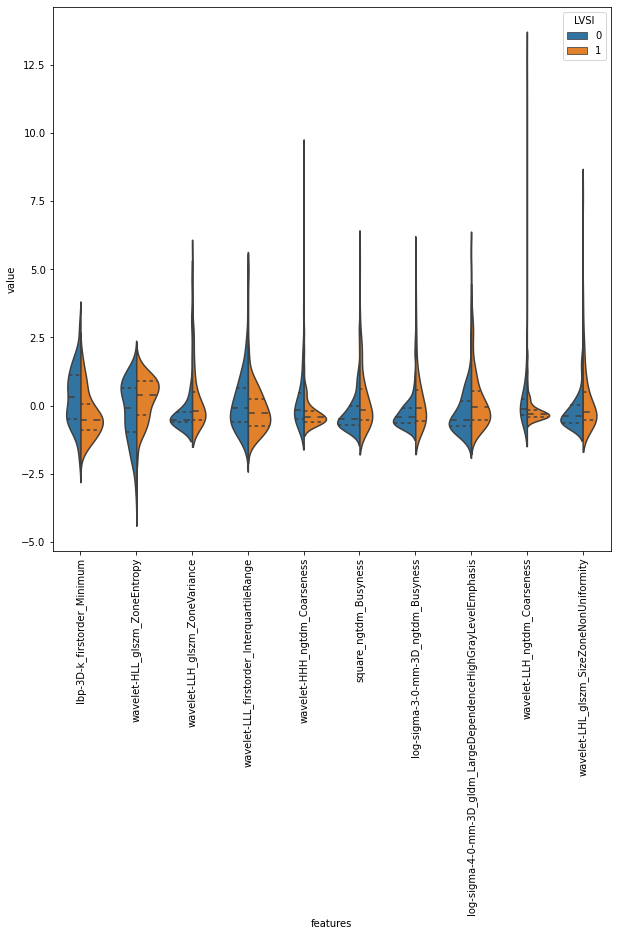

In [63]:
data_dia = y
data = x1[X_train_RFCg.columns]
data_n_2 = (data - data.mean()) / (data.std())              # 标准化
data = pd.concat([y,data_n_2.iloc[:,10:21]],axis=1)
data = pd.melt(data,id_vars="LVSI",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="LVSI", data=data, split=True, inner="quart")
plt.xticks(rotation=90)

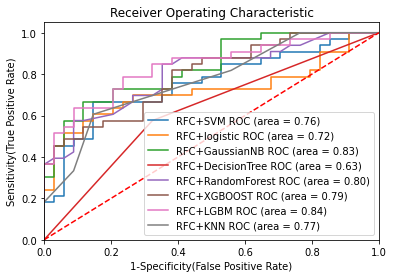

,m,AUC,SEN,SPE,ACC
0,RFC+SVM,0.756,0.667,0.735,0.701
1,RFC+logistic,0.721,0.667,0.765,0.716
2,RFC+GaussianNB,0.830,0.667,0.794,0.731
3,RFC+DecisionTree,0.626,0.576,0.676,0.627
4,RFC+RandomForest,0.800,0.606,0.794,0.701
5,RFC+XGBOOST,0.791,0.576,0.794,0.687
6,RFC+LGBM,0.837,0.636,0.794,0.716
7,RFC+KNN,0.766,0.606,0.853,0.731


In [46]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
result_model=[]
result_auc=[]
result_accuracy=[]
result_precision=[]
result_recall=[]
result_f1_score=[]
sensitivity=[]
specificity=[]
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'RFC+SVM',
    'model': SVC(probability=True,random_state=20,class_weight='balanced'
        ),
},
{
    'label': 'RFC+logistic',
    'model': LogisticRegression(random_state=20,
                                max_iter=100000,class_weight='balanced',
                                
                               solver='liblinear'),
        
},
{
    'label': 'RFC+GaussianNB',
    'model': GaussianNB(),
},
{
    'label': 'RFC+DecisionTree',
    'model': DecisionTreeClassifier(random_state=20,
                                   
                                    criterion='entropy'),
},
{
    'label': 'RFC+RandomForest',
    'model': RandomForestClassifier(
                                    criterion = 'entropy',
                                    random_state=20),
},
{
    'label': 'RFC+XGBOOST',
    'model': XGBClassifier(random_state=20) ,
},
    {
    'label': 'RFC+LGBM',
    'model':lgb.LGBMClassifier(random_state=20),
},
    {
    'label': 'RFC+KNN',
    'model':KNeighborsClassifier()
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_RFC, y_train_smo) # train the model
    y_pred=model.predict_proba(X_test_RFC) # predict the test data
    y_pre=model.predict(X_test_RFC)
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_RFC)[:,1])
# Calculate Area under the curve to display on the plot
 
    aauc = metrics.roc_auc_score(y_test,model.predict_proba(X_test_RFC)[:,1])
    result_auc.append(aauc)
    aaccuracy=metrics.accuracy_score(y_test,y_pre)
    result_accuracy.append(aaccuracy)
    apreci=metrics.precision_score(y_test,y_pre)
    result_precision.append(apreci)
    arecall=metrics.recall_score(y_test,y_pre)
    result_recall.append(arecall)
    af1_score=metrics.f1_score(y_test,y_pre)
    result_f1_score.append(af1_score)
    result_model.append(m['label'])
    confusion = confusion_matrix(y_test,y_pre)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    a_Sensitivity=TP / float(TP+FN)
    sensitivity.append(a_Sensitivity)
    a_Specificity=TN / float(TN+FP)
    specificity.append(a_Specificity)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], aauc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()   # Display
result4={'m':result_model,
         'AUC':result_auc,
         'SEN':sensitivity,
         'SPE':specificity,
        'ACC':result_accuracy,
        #'precision':aresult_precision,
        #'recall':aresult_recall,
       # 'f1_score':aresult_f1_score
        }
frame4 = pd.DataFrame(result4)
frame4

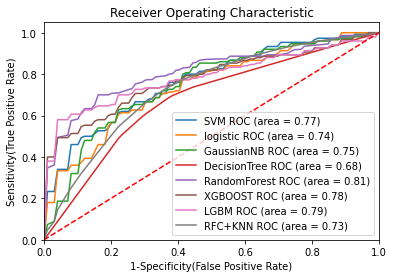

,m,K-foldAUC,95%CI,RSD,交叉验证平均Sensitivity,交叉验证平均Specificity
0,SVM,0.765,"(0.7256574530946877, 0.8049598308559297)",0.045,0.637,0.770
1,logistic,0.741,"(0.7065133261290275, 0.7760317830827483)",0.041,0.644,0.738
2,GaussianNB,0.749,"(0.6851943052958651, 0.8120516586167652)",0.074,0.646,0.730
3,DecisionTree,0.678,"(0.6341342673517839, 0.7210794078618913)",0.056,0.653,0.720
4,RandomForest,0.811,"(0.776425867071555, 0.8492626419502874)",0.039,0.658,0.736
5,XGBOOST,0.776,"(0.7557042379240486, 0.7992245370047264)",0.024,0.658,0.736
6,LGBM,0.785,"(0.733611880045278, 0.8385058787391477)",0.058,0.661,0.743
7,RFC+KNN,0.730,"(0.677325150501307, 0.7823804525376293)",0.063,0.659,0.741


In [47]:
data=X_train_raw
data=data[X_train_RFC.columns]
label=pd.DataFrame(y_train)
dataa=pd.concat([label,data],axis = 1)
Xp = dataa.iloc[:,1:]
yp = dataa['LVSI']
 
  
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
plt.figure()
result_kauc=[]
result_RSD=[]
result_model=[]
result_kSensitivity=[]
result_kSpecificity=[]
CIs=[]
# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'SVM',
    'model': SVC(probability=True,random_state=20,class_weight='balanced'
        ),
},
{
    'label': 'logistic',
    'model': LogisticRegression(random_state=20,
                                max_iter=100000,class_weight='balanced',
                                
                               solver='liblinear'),
        
},
{
    'label': 'GaussianNB',
    'model': GaussianNB(),
},
{
    'label': 'DecisionTree',
    'model': DecisionTreeClassifier(random_state=20,
                                   
                                    criterion='entropy'),
},
{
    'label': 'RandomForest',
    'model': RandomForestClassifier(
                                    criterion = 'entropy',
                                    random_state=20),
},
{
    'label': 'XGBOOST',
    'model': XGBClassifier(random_state=20) ,
},
    {
    'label': 'LGBM',
    'model':lgb.LGBMClassifier(random_state=20),
},
    {
    'label': 'RFC+KNN',
    'model':KNeighborsClassifier()
}
]
for m in models:
    model = m['model'] 
    #定义n折交叉验证
    tprs=[]
    aucs=[]
    kSensitivity=[]
    kSpecificity=[]
    mean_fpr=np.linspace(0,1,100)
    skFold=RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=25)
    i=0
    for train,test in skFold.split(Xp,yp):
        PX_train, PX_test = Xp.iloc[train], Xp.iloc[test]
        Py_train, Py_test = yp.iloc[train], yp.iloc[test]
        model.fit(PX_train,Py_train)
        y_pred=model.predict(PX_test)
        fpr, tpr, thresholds = metrics.roc_curve(Py_test,model.predict_proba(PX_test)[:,1])
        tprs.append(np.interp(mean_fpr,fpr,tpr))
        tprs[-1][0]=0.0
        roc_auc=auc(fpr,tpr)
        aucs.append(roc_auc)  
        confusion = confusion_matrix(Py_test,y_pred)
        TP = confusion[1, 1]
        TN = confusion[0, 0]
        FP = confusion[0, 1]
        FN = confusion[1, 0]
        k_Sensitivity=TP / float(TP+FN)
        sensitivity.append(k_Sensitivity)
        k_Specificity=TN / float(TN+FP)
        specificity.append(k_Specificity)
        i+=1
    mean_tpr=np.mean(tprs,axis=0)
    mean_tpr[-1]=1.0
    mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
    std_auc=np.std(aucs,axis=0)
    RSD=std_auc/mean_auc
    sem_auc=stats.sem(aucs,axis=0)
    CI = stats.t.interval(0.95,df=len(aucs)-1,loc=np.mean(aucs),scale=sem_auc)
    CIs.append(CI)  
    k_Sensitivity=np.mean(sensitivity)
    k_Specificity=np.mean(specificity)
    result_model.append(m['label'])
    result_kauc.append(mean_auc)
    result_RSD.append(RSD)
    result_kSensitivity.append(k_Sensitivity)
    result_kSpecificity.append(k_Specificity)
    #plt.fill_between(mean_tpr,tprs_lower,tprs_upper,color='gray',alpha=.2)
    plt.plot(mean_fpr,mean_tpr,label='%s ROC (area = %0.2f)' % (m['label'], mean_auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

resultk4={'m':result_model,
         'K-foldAUC':result_kauc,
        '95%CI':CIs,
        'RSD':result_RSD,
        '交叉验证平均Sensitivity':result_kSensitivity,
       '交叉验证平均Specificity':result_kSpecificity}
framex4= pd.DataFrame(resultk4)
framex4

# 方差法

In [48]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

In [49]:
selector_var = VarianceThreshold(1)
X_var = selector_var.fit_transform(X_train_smo)
X_var.shape

(160, 1)

In [50]:
columns=X_train_smo.columns[selector_var.get_support()]
X_train_smo.columns

Index(['FIGO Stage', 'wavelet-HHL_ngtdm_Contrast',
       'log-sigma-2-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis',
       'exponential_glszm_LargeAreaEmphasis', 'wavelet-HLH_ngtdm_Coarseness',
       'wavelet-LLL_firstorder_RobustMeanAbsoluteDeviation',
       'square_glrlm_RunVariance', 'DSI',
       'squareroot_glszm_GrayLevelNonUniformity', 'square_glcm_Correlation',
       'wavelet-HLL_glcm_Imc1',
       'log-sigma-3-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmphasis',
       'log-sigma-4-0-mm-3D_glcm_Imc1',
       'logarithm_glszm_LargeAreaHighGrayLevelEmphasis',
       'squareroot_ngtdm_Busyness', 'wavelet-HHH_glrlm_RunEntropy',
       'wavelet-LLH_glszm_LargeAreaEmphasis',
       'wavelet-HHL_glszm_SmallAreaLowGrayLevelEmphasis',
       'log-sigma-4-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis',
       'wavelet-LLH_glcm_InverseVariance',
       'original_glrlm_RunLengthNonUniformity', 'square_glrlm_LongRunEmphasis',
       'log-sigma-2-0-mm-3D_gldm_LargeDependenceHighGrayLevelEmph

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

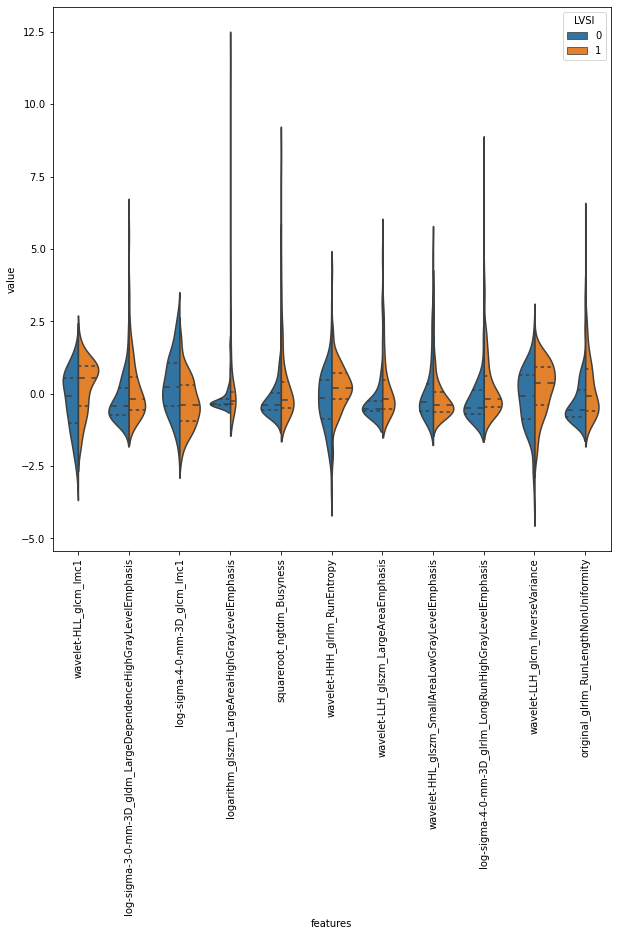

In [51]:
data_dia = y
data = x1[X_train_smo.columns]
data_n_2 = (data - data.mean()) / (data.std())              # 标准化
data = pd.concat([y,data_n_2.iloc[:,10:21]],axis=1)
data = pd.melt(data,id_vars="LVSI",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="LVSI", data=data, split=True, inner="quart")
plt.xticks(rotation=90)

In [52]:
X_var = pd.DataFrame(X_var, columns = X_train_smo.columns[selector_var.get_support()])
data=X_train_raw
data=data[X_var.columns]
label=pd.DataFrame(y_train)
X_test_var=X_test[X_var.columns]

In [53]:
X_train_VARg=X_var 
X_test_VARg=X_test_var
X_test_VARg

,FIGO Stage
0,1.546
1,1.546
2,-0.850
3,-0.850
4,1.546
...,...
62,0.348
63,-0.850
64,0.348
65,-0.850


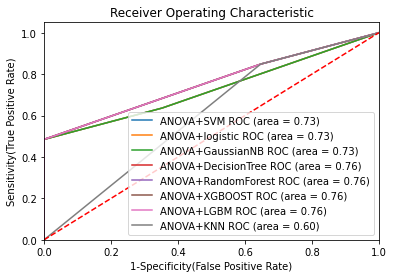

,m,AUC,SEN,SPE,ACC
0,ANOVA+SVM,0.727,0.485,1.000,0.746
1,ANOVA+logistic,0.727,0.636,0.647,0.642
2,ANOVA+GaussianNB,0.727,0.636,0.647,0.642
3,ANOVA+DecisionTree,0.758,0.485,1.000,0.746
4,ANOVA+RandomForest,0.758,0.485,1.000,0.746
5,ANOVA+XGBOOST,0.758,0.485,1.000,0.746
6,ANOVA+LGBM,0.758,0.485,1.000,0.746
7,ANOVA+KNN,0.601,0.848,0.353,0.597


In [54]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
result_model=[]
result_auc=[]
result_accuracy=[]
result_precision=[]
result_recall=[]
result_f1_score=[]
sensitivity=[]
specificity=[]
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'ANOVA+SVM',
    'model': SVC(probability=True,random_state=20,class_weight='balanced'
        ),
},
{
    'label': 'ANOVA+logistic',
    'model': LogisticRegression(random_state=20,
                                max_iter=100000,
                                class_weight='balanced',
                               solver='liblinear'),
        
},
{
    'label': 'ANOVA+GaussianNB',
    'model': GaussianNB(),
},
{
    'label': 'ANOVA+DecisionTree',
    'model': DecisionTreeClassifier(random_state=20,
                                   
                                    criterion='entropy'),
},
{
    'label': 'ANOVA+RandomForest',
    'model': RandomForestClassifier(
                                    criterion = 'entropy',
                                    random_state=20),
},
{
    'label': 'ANOVA+XGBOOST',
    'model': XGBClassifier(random_state=20) ,
},
    {
    'label': 'ANOVA+LGBM',
    'model':lgb.LGBMClassifier(random_state=20),
},
    {
    'label': 'ANOVA+KNN',
    'model':KNeighborsClassifier()
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_var, y_train_smo) # train the model
    y_pred=model.predict_proba(X_test_var) # predict the test data
    y_pre=model.predict(X_test_var)
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_var)[:,1])
# Calculate Area under the curve to display on the plot
 
    aauc = metrics.roc_auc_score(y_test,model.predict_proba(X_test_var)[:,1])
    result_auc.append(aauc)
    aaccuracy=metrics.accuracy_score(y_test,y_pre)
    result_accuracy.append(aaccuracy)
    apreci=metrics.precision_score(y_test,y_pre)
    result_precision.append(apreci)
    arecall=metrics.recall_score(y_test,y_pre)
    result_recall.append(arecall)
    af1_score=metrics.f1_score(y_test,y_pre)
    result_f1_score.append(af1_score)
    result_model.append(m['label'])
    confusion = confusion_matrix(y_test,y_pre)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    a_Sensitivity=TP / float(TP+FN)
    sensitivity.append(a_Sensitivity)
    a_Specificity=TN / float(TN+FP)
    specificity.append(a_Specificity)
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], aauc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()   # Display
result5={'m':result_model,
         'AUC':result_auc,
         'SEN':sensitivity,
         'SPE':specificity,
        'ACC':result_accuracy,
        #'precision':aresult_precision,
        #'recall':aresult_recall,
       # 'f1_score':aresult_f1_score
        }
frame5 = pd.DataFrame(result5)
frame5

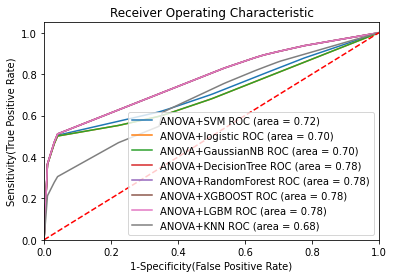

,m,K-foldAUC,95%CI,RSD,交叉验证平均Sensitivity,交叉验证平均Specificity
0,ANOVA+SVM,0.717,"(0.6563712876144862, 0.7802573923475272)",0.075,0.536,0.898
1,ANOVA+logistic,0.700,"(0.6446082012149282, 0.7594278861544926)",0.071,0.551,0.823
2,ANOVA+GaussianNB,0.700,"(0.6446082012149282, 0.7594278861544926)",0.071,0.558,0.792
3,ANOVA+DecisionTree,0.777,"(0.7374085719367364, 0.820055815527651)",0.046,0.546,0.828
4,ANOVA+RandomForest,0.777,"(0.7374085719367364, 0.820055815527651)",0.046,0.538,0.853
5,ANOVA+XGBOOST,0.777,"(0.7374085719367364, 0.820055815527651)",0.046,0.531,0.872
6,ANOVA+LGBM,0.777,"(0.7374085719367364, 0.820055815527651)",0.046,0.527,0.886
7,ANOVA+KNN,0.683,"(0.5374638588886853, 0.8312825798577537)",0.187,0.555,0.832


In [55]:
data=X_train_raw
data=data[X_var.columns]
label=pd.DataFrame(y_train)
dataa=pd.concat([label,data],axis = 1)
Xp = dataa.iloc[:,1:]
yp = dataa['LVSI']
 
  
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
plt.figure()
result_kauc=[]
result_RSD=[]
result_model=[]
result_kSensitivity=[]
result_kSpecificity=[]
CIs=[]
# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'ANOVA+SVM',
    'model': SVC(probability=True,random_state=20,class_weight='balanced'
        ),
},
{
    'label': 'ANOVA+logistic',
    'model': LogisticRegression(random_state=20,
                                max_iter=100000,class_weight='balanced',
                                
                               solver='liblinear'),
        
},
{
    'label': 'ANOVA+GaussianNB',
    'model': GaussianNB(),
},
{
    'label': 'ANOVA+DecisionTree',
    'model': DecisionTreeClassifier(random_state=20,
                                   
                                    criterion='entropy'),
},
{
    'label': 'ANOVA+RandomForest',
    'model': RandomForestClassifier(
                                    criterion = 'entropy',
                                    random_state=20),
},
{
    'label': 'ANOVA+XGBOOST',
    'model': XGBClassifier(random_state=20) ,
},
    {
    'label': 'ANOVA+LGBM',
    'model':lgb.LGBMClassifier(random_state=20),
},
   
    {
    'label': 'ANOVA+KNN',
    'model':KNeighborsClassifier()
}
]
for m in models:
    model = m['model'] 
    #定义n折交叉验证
    tprs=[]
    aucs=[]
    kSensitivity=[]
    kSpecificity=[]
    mean_fpr=np.linspace(0,1,100)
    skFold=RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=25)
    i=0
    for train,test in skFold.split(Xp,yp):
        PX_train, PX_test = Xp.iloc[train], Xp.iloc[test]
        Py_train, Py_test = yp.iloc[train], yp.iloc[test]
        model.fit(PX_train,Py_train)
        y_pred=model.predict(PX_test)
        fpr, tpr, thresholds = metrics.roc_curve(Py_test,model.predict_proba(PX_test)[:,1])
        tprs.append(np.interp(mean_fpr,fpr,tpr))
        tprs[-1][0]=0.0
        roc_auc=auc(fpr,tpr)
        aucs.append(roc_auc)  
        confusion = confusion_matrix(Py_test,y_pred)
        TP = confusion[1, 1]
        TN = confusion[0, 0]
        FP = confusion[0, 1]
        FN = confusion[1, 0]
        k_Sensitivity=TP / float(TP+FN)
        sensitivity.append(k_Sensitivity)
        k_Specificity=TN / float(TN+FP)
        specificity.append(k_Specificity)
        i+=1
    mean_tpr=np.mean(tprs,axis=0)
    mean_tpr[-1]=1.0
    mean_auc=auc(mean_fpr,mean_tpr)#计算平均AUC值
    std_auc=np.std(aucs,axis=0)
    RSD=std_auc/mean_auc
    sem_auc=stats.sem(aucs,axis=0)
    CI = stats.t.interval(0.95,df=len(aucs)-1,loc=np.mean(aucs),scale=sem_auc)
    CIs.append(CI)  
    k_Sensitivity=np.mean(sensitivity)
    k_Specificity=np.mean(specificity)
    result_model.append(m['label'])
    result_kauc.append(mean_auc)
    result_RSD.append(RSD)
    result_kSensitivity.append(k_Sensitivity)
    result_kSpecificity.append(k_Specificity)
    #plt.fill_between(mean_tpr,tprs_lower,tprs_upper,color='gray',alpha=.2)
    plt.plot(mean_fpr,mean_tpr,label='%s ROC (area = %0.2f)' % (m['label'], mean_auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

resultk5={'m':result_model,
         'K-foldAUC':result_kauc,
        '95%CI':CIs,
        'RSD':result_RSD,
        '交叉验证平均Sensitivity':result_kSensitivity,
       '交叉验证平均Specificity':result_kSpecificity}
framex5= pd.DataFrame(resultk5)
framex5

       MRMR  LASSO     MI    RFE    RFC  ANOVA    MIC
SVM   0.706  0.773  0.721  0.756  0.765  0.717  0.733
LG    0.731  0.758  0.686  0.737  0.741  0.700  0.689
NB    0.712  0.798  0.709  0.745  0.749  0.700  0.711
DT    0.662  0.661  0.711  0.685  0.678  0.777  0.682
RF    0.783  0.780  0.797  0.806  0.811  0.777  0.785
XGB   0.766  0.739  0.798  0.777  0.776  0.777  0.799
LGBM  0.745  0.720  0.767  0.764  0.785  0.777  0.770
KNN   0.629  0.759  0.678  0.705  0.730  0.683  0.672


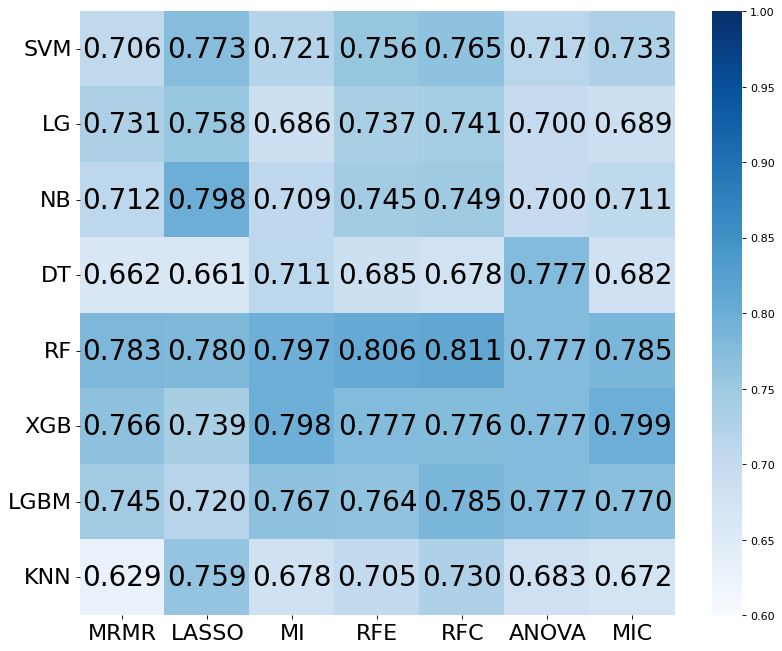

In [56]:
data_auc = pd.concat([framex0['K-foldAUC'],framex1['K-foldAUC'],framex2['K-foldAUC'],framex3['K-foldAUC'],framex4['K-foldAUC'],framex5['K-foldAUC'],framex6['K-foldAUC']], axis=1)
data_auc.columns = ['MRMR','LASSO','MI','RFE','RFC','ANOVA','MIC']
data_auc.index = ['SVM','LG','NB','DT','RF','XGB','LGBM','KNN']
print(data_auc)
data_auc_g=data_auc
plt.figure(figsize=(12,10),dpi=80)
sns.heatmap(data_auc,cmap="Blues",annot=True,vmin=0.6,vmax=1,fmt='.3f',annot_kws={'size':25,'color':'black'})
plt.tick_params(labelsize=20,rotation=0)

In [57]:
np.mean(data_auc,1)

SVM     0.739
LG      0.720
NB      0.732
DT      0.694
RF      0.792
XGB     0.776
LGBM    0.761
KNN     0.694
dtype: float64

In [58]:
np.mean(data_auc,0)

MRMR     0.717
LASSO    0.749
MI       0.733
RFE      0.747
RFC      0.754
ANOVA    0.739
MIC      0.730
dtype: float64

       MRMR  LASSO     MI    RFE    RFC  ANOVA    MIC
SVM   0.076  0.063  0.042  0.071  0.045  0.075  0.041
LG    0.045  0.058  0.024  0.076  0.041  0.071  0.034
NB    0.079  0.047  0.059  0.081  0.074  0.071  0.077
DT    0.092  0.026  0.076  0.078  0.056  0.046  0.078
RF    0.048  0.061  0.063  0.042  0.039  0.046  0.049
XGB   0.050  0.056  0.048  0.025  0.024  0.046  0.045
LGBM  0.062  0.075  0.057  0.044  0.058  0.046  0.055
KNN   0.116  0.099  0.082  0.080  0.063  0.187  0.078


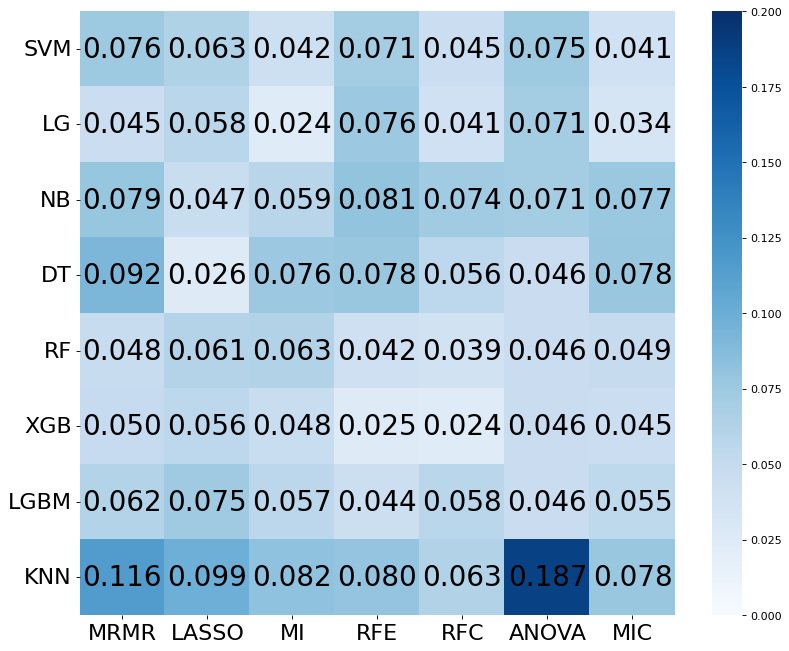

In [59]:
data_rsd = pd.concat([framex0['RSD'],framex1['RSD'],framex2['RSD'],framex3['RSD'],framex4['RSD'],framex5['RSD'],framex6['RSD']], axis=1)
data_rsd.columns = ['MRMR','LASSO','MI','RFE','RFC','ANOVA','MIC']
data_rsd.index = ['SVM','LG','NB','DT','RF','XGB','LGBM','KNN']
data_rsd_g=data_rsd
print(data_rsd)
plt.figure(figsize=(12,10),dpi=80)
sns.heatmap(data_rsd,cmap="Blues",vmin=0,vmax=0.2,annot=True,fmt='.3f',annot_kws={'size':25,'color':'black'})
plt.tick_params(labelsize=20,rotation=0)

       MRMR  LASSO     MI    RFE    RFC  ANOVA    MIC
SVM   0.782  0.800  0.745  0.721  0.756  0.727  0.739
LG    0.780  0.817  0.763  0.747  0.721  0.727  0.735
NB    0.827  0.872  0.821  0.840  0.830  0.727  0.794
DT    0.685  0.731  0.716  0.656  0.626  0.758  0.731
RF    0.828  0.852  0.867  0.786  0.800  0.758  0.835
XGB   0.745  0.864  0.822  0.768  0.791  0.758  0.794
LGBM  0.763  0.824  0.792  0.751  0.837  0.758  0.799
KNN   0.816  0.847  0.871  0.683  0.766  0.601  0.852


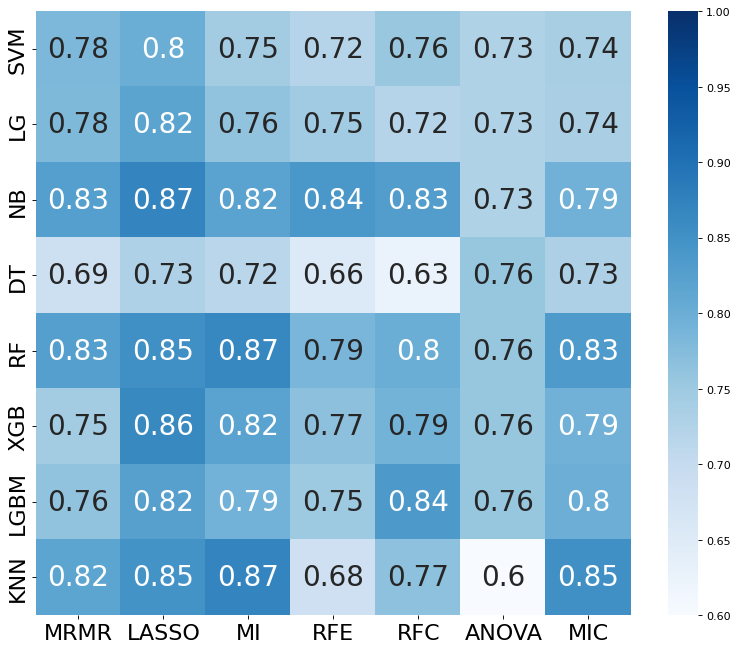

In [60]:
data_auc = pd.concat([frame0['AUC'],frame1['AUC'],frame2['AUC'],frame3['AUC'],frame4['AUC'],frame5['AUC'],frame6['AUC']], axis=1)
data_auc.columns = ['MRMR','LASSO','MI','RFE','RFC','ANOVA','MIC']
data_auc.index = ['SVM','LG','NB','DT','RF','XGB','LGBM','KNN']
print(data_auc)
plt.figure(figsize=(12,10),dpi=80)
sns.heatmap(data_auc,cmap="Blues",annot=True,vmin=0.6,vmax=1,annot_kws={'size':25})
plt.tick_params(labelsize=20)

In [61]:
# 现将表构成list，然后在作为concat的输入
frames = [frame0,frame1, frame2,frame3,frame4,frame5,frame6]
result1 = pd.concat(frames)
result1

,m,AUC,SEN,SPE,ACC
0,Mrmr+SVM,0.782,0.697,0.794,0.746
1,Mrmr+logistic,0.780,0.758,0.706,0.731
2,Mrmr+GaussianNB,0.827,0.545,0.824,0.687
3,Mrmr+DecisionTree,0.685,0.606,0.765,0.687
4,Mrmr+RandomForest,0.828,0.636,0.912,0.776
5,Mrmr+XGBOOST,0.745,0.545,0.794,0.672
6,Mrmr+LGBM,0.763,0.545,0.941,0.746
7,Mrmr+KNN,0.816,0.697,0.824,0.761
0,LASSO+SVM,0.800,0.606,0.912,0.761
1,LASSO+logistic,0.817,0.697,0.735,0.716
